# PHASE 3 PROJECT

Final Project Submission

Please fill out:

Student name: ANGEL LINAH ATUNGIRE

Student pace: PART TIME

Instructor name: STELLA WAITHERA


# Predicting the Primary Contributory Cause of a Car Accident

## Project Overview

The dataset used for this analysis is [Chicago car crash data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if) collected from 2015 to 2023. The analysis and modeling are conducted for the benefit of "CHASING PAVEMENTS," a vehicle safety board with a mission to invest in reducing traffic accidents. This report provides a summary of the business problem, an understanding of the data, and the steps taken in the analysis to select the best machine learning model for classification.

## Business Problem

CHASING PAVEMNETS is dedicated to enhancing road safety and minimizing traffic accidents in the Chicago area. To achieve this goal, they aim to leverage data-driven insights and predictive modeling. The primary business problem is to identify the primary contributory cause of a car accident using the most effective machine learning model that can classify traffic accidents based on various attributes. This classification model will aid in the early detection of high-risk areas, allowing CHASING PAVEMENTS to allocate resources strategically, implement safety measures, and work towards reducing accidents.

## Data understanding 

The data used for this analysis comprises three datasets, [Passengers](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d), [vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3), and [car crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if), collectively covering car crash data in Chicago from 2015 to 2023. These datasets were carefully cleaned and transformed for analysis, resulting in a numerical format that is conducive to machine learning. The integrated dataset includes attributes such as Driver error, weather conditions, road defects, primary contributory causes, and various other features.

By combining these datasets, I have harnessed a rich source of information. This comprehensive dataset empowers me to gain insights into the factors influencing car accidents in Chicago. The integration of these datasets allowed me to explore relationships and patterns that would not have been apparent by analyzing them individually.

Throughout this analysis, we investigated multiple machine learning models for classification, seeking the one that demonstrates the highest predictive accuracy. The selected model represents a significant asset for CHASING PAVEMENTS, enabling data-driven decision-making and the strategic allocation of resources to enhance road safety and reduce traffic accidents in the Chicago area.

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.metrics import classification_report, roc_curve, auc 


In [2]:
# Reading the files 
crashes = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
people = pd.read_csv('data/Traffic_Crashes_-_People.csv', low_memory=False)
vehicles = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv', low_memory=False)

### Data Exploration
 

In [3]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769747 entries, 0 to 769746
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                769747 non-null  object 
 1   RD_NO                          765294 non-null  object 
 2   CRASH_DATE_EST_I               57931 non-null   object 
 3   CRASH_DATE                     769747 non-null  object 
 4   POSTED_SPEED_LIMIT             769747 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         769747 non-null  object 
 6   DEVICE_CONDITION               769747 non-null  object 
 7   WEATHER_CONDITION              769747 non-null  object 
 8   LIGHTING_CONDITION             769747 non-null  object 
 9   FIRST_CRASH_TYPE               769747 non-null  object 
 10  TRAFFICWAY_TYPE                769747 non-null  object 
 11  LANE_CNT                       199005 non-null  float64
 12  ALIGNMENT                     

In [4]:
# check for missing values
crashes.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4453
CRASH_DATE_EST_I                 711816
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         570742
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       22220
CRASH_TYPE                            0
INTERSECTION_RELATED_I           593405
NOT_RIGHT_OF_WAY_I               734026
HIT_AND_RUN_I                    529392
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [5]:
# check for missing values
people.isna().sum()

PERSON_ID                     0
PERSON_TYPE                   4
CRASH_RECORD_ID               4
RD_NO                         4
VEHICLE_ID                 9784
CRASH_DATE                    4
SEAT_NO                  390060
CITY                     152624
STATE                    144649
ZIPCODE                  186515
SEX                        8737
AGE                      161582
DRIVERS_LICENSE_STATE    230021
DRIVERS_LICENSE_CLASS    283010
SAFETY_EQUIPMENT           1433
AIRBAG_DEPLOYED            8946
EJECTION                   5812
INJURY_CLASSIFICATION       155
HOSPITAL                 419970
EMS_AGENCY               453752
EMS_RUN_NO               495424
DRIVER_ACTION            117138
DRIVER_VISION            117327
PHYSICAL_CONDITION       116887
PEDPEDAL_ACTION          497461
PEDPEDAL_VISIBILITY      497470
PEDPEDAL_LOCATION        497462
BAC_RESULT               117162
BAC_RESULT VALUE         505684
CELL_PHONE_USE           506266
dtype: int64

In [6]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506284 entries, 0 to 506283
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              506284 non-null  object 
 1   PERSON_TYPE            506280 non-null  object 
 2   CRASH_RECORD_ID        506280 non-null  object 
 3   RD_NO                  506280 non-null  object 
 4   VEHICLE_ID             496500 non-null  float64
 5   CRASH_DATE             506280 non-null  object 
 6   SEAT_NO                116224 non-null  float64
 7   CITY                   353660 non-null  object 
 8   STATE                  361635 non-null  object 
 9   ZIPCODE                319769 non-null  object 
 10  SEX                    497547 non-null  object 
 11  AGE                    344702 non-null  float64
 12  DRIVERS_LICENSE_STATE  276263 non-null  object 
 13  DRIVERS_LICENSE_CLASS  223274 non-null  object 
 14  SAFETY_EQUIPMENT       504851 non-nu

In [7]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570389 entries, 0 to 1570388
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1570389 non-null  int64  
 1   CRASH_RECORD_ID           1570389 non-null  object 
 2   RD_NO                     1561313 non-null  object 
 3   CRASH_DATE                1570389 non-null  object 
 4   UNIT_NO                   1570389 non-null  int64  
 5   UNIT_TYPE                 1568315 non-null  object 
 6   NUM_PASSENGERS            232448 non-null   float64
 7   VEHICLE_ID                1534499 non-null  float64
 8   CMRC_VEH_I                29289 non-null    object 
 9   MAKE                      1534494 non-null  object 
 10  MODEL                     1534349 non-null  object 
 11  LIC_PLATE_STATE           1394215 non-null  object 
 12  VEHICLE_YEAR              1286700 non-null  float64
 13  VEHICLE_DEFECT            1

In [8]:
# check for missing values 
vehicles.isna().sum()

CRASH_UNIT_ID                    0
CRASH_RECORD_ID                  0
RD_NO                         9076
CRASH_DATE                       0
UNIT_NO                          0
                            ...   
CARGO_BODY_TYPE            1557597
LOAD_TYPE                  1558151
HAZMAT_OUT_OF_SERVICE_I    1559267
MCS_OUT_OF_SERVICE_I       1559015
HAZMAT_CLASS               1569328
Length: 72, dtype: int64

In [9]:
# viewing the first few columns
crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000ececd00a4474d1abebf13221e4a97efd79a0322f117...,JG360767,NaN,07/29/2023 11:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,7,7,41.895745,-87.706710,POINT (-87.706709567706 41.895744504664)
1,00e20a26e53d0c6806fdb89244115fc27bdb3b368e1d03...,JG434999,NaN,09/22/2023 06:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,9,41.823938,-87.632617,POINT (-87.632617158418 41.823938255628)
2,018bf30065a8947fb73e947c0bd197536d746d60b49eb3...,JG412388,NaN,09/05/2023 03:54:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REAR END,...,0.0,0.0,2.0,0.0,15,3,9,41.922931,-87.746119,POINT (-87.746119477943 41.922931042554)
3,01ddd522eb074a6cbec117c10de0cae2cb78d2a6dd94b2...,JG412232,NaN,09/05/2023 01:33:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,13,3,9,41.711641,-87.534202,POINT (-87.534201556839 41.711641416553)
4,01eb75485f6215d7b60bc219666c21564ac2ce46c578fb...,JG412428,NaN,09/05/2023 02:59:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,14,3,9,41.844085,-87.705177,POINT (-87.705176886078 41.844084644336)


In [10]:
# viewing the first few columns
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [11]:
# viewing the first few columns
vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1,DRIVER,NaN,1478881.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1554881,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,2,DRIVER,1.0,1478892.0,NaN,ISUZU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# checking the shape of the dataframe
crashes.shape

(769747, 49)

In [13]:
# checking the shape of the dataframe
people.shape

(506284, 30)

In [14]:
# checking the shape of the dataframe
vehicles.shape

(1570389, 72)

### Merging the datasets
merging the datasets also helps to get rid of some of the null values 

In [15]:
# Merge the datasets using CRASH_RECORD_ID
merged_data = crashes.merge(people, on='CRASH_RECORD_ID', how='inner')
merged_data = merged_data.merge(vehicles, on='CRASH_RECORD_ID', how='inner')

# merging the datasets, also helps to get rid of some of the rows with missing values

# Now, merged_data contains all three datasets joined on CRASH_RECORD_ID
merged_data.shape

(1072997, 149)

In [16]:
# viewing the first few column of the merged dataset
merged_data.head()

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,0fac404e6fb73fa811e299325e82bab35295899a2cbf03...,JG361172,NaN,07/29/2023 05:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0fac404e6fb73fa811e299325e82bab35295899a2cbf03...,JG361172,NaN,07/29/2023 05:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0fac404e6fb73fa811e299325e82bab35295899a2cbf03...,JG361172,NaN,07/29/2023 05:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0fac404e6fb73fa811e299325e82bab35295899a2cbf03...,JG361172,NaN,07/29/2023 05:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0fac404e6fb73fa811e299325e82bab35295899a2cbf03...,JG361172,NaN,07/29/2023 05:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# clearly its too large to display its info, we need to select the features we desire.
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072997 entries, 0 to 1072996
Columns: 149 entries, CRASH_RECORD_ID to HAZMAT_CLASS
dtypes: float64(24), int64(8), object(117)
memory usage: 1.2+ GB


### Column Selection
selecting columns that i think are relevant to the prediction of primamry causes of accidents, i.e, columns that have data about events/conditions that happened before the car crash

In [18]:
# Feature Selection

# Define a list of columns from the "people" dataset to select
people_columns = [
    "PERSON_TYPE",
    "SEX",
    "AGE",
    "SAFETY_EQUIPMENT",
    "INJURY_CLASSIFICATION",
    "DRIVER_ACTION",
    "DRIVER_VISION",
    "PHYSICAL_CONDITION",
    "CELL_PHONE_USE"
]

# Define a list of columns from the "vehicles" dataset to select
vehicles_columns = [
    "VEHICLE_DEFECT",
    "MANEUVER",
    "UNIT_TYPE"
]

# Combine the selected columns from "crashes", "people", and "vehicles"
selected_columns = [
    "DEVICE_CONDITION",
    "WEATHER_CONDITION",
    "LIGHTING_CONDITION",
    "TRAFFIC_CONTROL_DEVICE",
    "TRAFFICWAY_TYPE",
    "ALIGNMENT",
    "ROADWAY_SURFACE_COND",
    "ROAD_DEFECT",
    "CRASH_TYPE",    
    "PRIM_CONTRIBUTORY_CAUSE"
] + people_columns + vehicles_columns

# Create a new dataframe with the selected columns from all three datasets
final_data = merged_data[selected_columns]

# Display the first few rows of the new dataframe
final_data.head()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,CELL_PHONE_USE,VEHICLE_DEFECT,MANEUVER,UNIT_TYPE
0,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,30.0,USAGE UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NONE,SLOW/STOP IN TRAFFIC,DRIVER
1,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,30.0,USAGE UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NONE,STRAIGHT AHEAD,DRIVER
2,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,30.0,USAGE UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,UNKNOWN,SLOW/STOP IN TRAFFIC,DRIVER
3,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,7.0,USAGE UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NONE,SLOW/STOP IN TRAFFIC,DRIVER
4,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,7.0,USAGE UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NONE,STRAIGHT AHEAD,DRIVER


In [19]:
# viewing the shape of the final dataframe
final_data.shape

(1072997, 22)

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072997 entries, 0 to 1072996
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DEVICE_CONDITION         1072997 non-null  object 
 1   WEATHER_CONDITION        1072997 non-null  object 
 2   LIGHTING_CONDITION       1072997 non-null  object 
 3   TRAFFIC_CONTROL_DEVICE   1072997 non-null  object 
 4   TRAFFICWAY_TYPE          1072997 non-null  object 
 5   ALIGNMENT                1072997 non-null  object 
 6   ROADWAY_SURFACE_COND     1072997 non-null  object 
 7   ROAD_DEFECT              1072997 non-null  object 
 8   CRASH_TYPE               1072997 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  1072997 non-null  object 
 10  PERSON_TYPE              1072997 non-null  object 
 11  SEX                      1054401 non-null  object 
 12  AGE                      734156 non-null   float64
 13  SAFETY_EQUIPMENT         1069549 non-null 

In [21]:
# checkinh for null values
final_data.isna().sum()

DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
TRAFFIC_CONTROL_DEVICE           0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
PRIM_CONTRIBUTORY_CAUSE          0
PERSON_TYPE                      0
SEX                          18596
AGE                         338841
SAFETY_EQUIPMENT              3448
INJURY_CLASSIFICATION          399
DRIVER_ACTION               248948
DRIVER_VISION               249388
PHYSICAL_CONDITION          248378
CELL_PHONE_USE             1072955
VEHICLE_DEFECT               25227
MANEUVER                     25227
UNIT_TYPE                     1167
dtype: int64

In [22]:
# decided to drop the columns with more than 50% missing values
final_data = final_data.drop("CELL_PHONE_USE", axis=1)

In [23]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072997 entries, 0 to 1072996
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DEVICE_CONDITION         1072997 non-null  object 
 1   WEATHER_CONDITION        1072997 non-null  object 
 2   LIGHTING_CONDITION       1072997 non-null  object 
 3   TRAFFIC_CONTROL_DEVICE   1072997 non-null  object 
 4   TRAFFICWAY_TYPE          1072997 non-null  object 
 5   ALIGNMENT                1072997 non-null  object 
 6   ROADWAY_SURFACE_COND     1072997 non-null  object 
 7   ROAD_DEFECT              1072997 non-null  object 
 8   CRASH_TYPE               1072997 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  1072997 non-null  object 
 10  PERSON_TYPE              1072997 non-null  object 
 11  SEX                      1054401 non-null  object 
 12  AGE                      734156 non-null   float64
 13  SAFETY_EQUIPMENT         1069549 non-null 

In [24]:
# value counts for the AGE column
final_data['AGE'].value_counts()

 25.0     21262
 26.0     20854
 27.0     20619
 28.0     20293
 24.0     20231
          ...  
 109.0        6
 107.0        4
-177.0        4
-47.0         4
 110.0        3
Name: AGE, Length: 111, dtype: int64

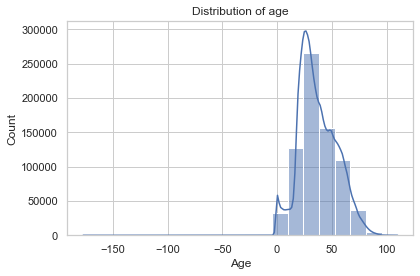

In [25]:
# Set the style of the plots
sns.set(style="whitegrid")

# Plot distribution for 'AGE'
sns.histplot(final_data['AGE'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of age')

# display the plot
plt.tight_layout()
plt.show()

In [26]:
# Fill missing values for 'AGE' with the median
median_age = final_data['AGE'].median()
final_data['AGE'].fillna(median_age, inplace=True)

# Filling the negative ages with the median, because no one has negative years of age
final_data['AGE'] = final_data['AGE'].apply(lambda x:median_age if x < 0 else x)

# Drop rows with missing values for the rest of the columns
final_data.dropna(inplace=True)

# Reset the index after dropping rows
final_data.reset_index(drop=True, inplace=True)

In [27]:
# This shows that we have dropped about 25% of our data, which is a reasonable amount.
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801979 entries, 0 to 801978
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DEVICE_CONDITION         801979 non-null  object 
 1   WEATHER_CONDITION        801979 non-null  object 
 2   LIGHTING_CONDITION       801979 non-null  object 
 3   TRAFFIC_CONTROL_DEVICE   801979 non-null  object 
 4   TRAFFICWAY_TYPE          801979 non-null  object 
 5   ALIGNMENT                801979 non-null  object 
 6   ROADWAY_SURFACE_COND     801979 non-null  object 
 7   ROAD_DEFECT              801979 non-null  object 
 8   CRASH_TYPE               801979 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  801979 non-null  object 
 10  PERSON_TYPE              801979 non-null  object 
 11  SEX                      801979 non-null  object 
 12  AGE                      801979 non-null  float64
 13  SAFETY_EQUIPMENT         801979 non-null  object 
 14  INJU

In [28]:
# checking for null values again.
final_data.isna().sum()

DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
TRAFFIC_CONTROL_DEVICE     0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
PRIM_CONTRIBUTORY_CAUSE    0
PERSON_TYPE                0
SEX                        0
AGE                        0
SAFETY_EQUIPMENT           0
INJURY_CLASSIFICATION      0
DRIVER_ACTION              0
DRIVER_VISION              0
PHYSICAL_CONDITION         0
VEHICLE_DEFECT             0
MANEUVER                   0
UNIT_TYPE                  0
dtype: int64

### EDA 
Performing Exploratory Data Analysis using the original datasets to find any relationships with the dataset, to view any trends and statistics that would help with out recommendation to the stakeholder.

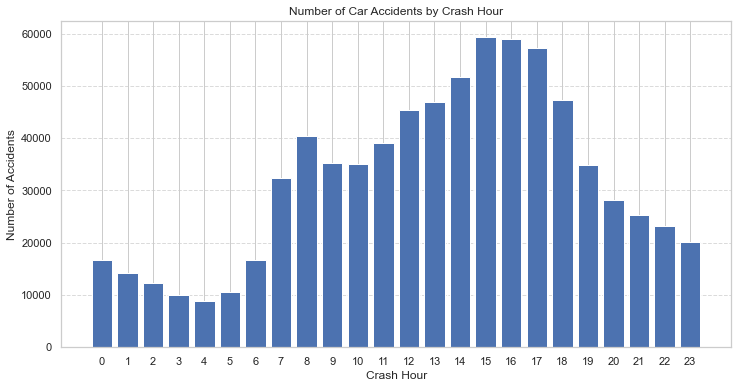

In [29]:
# Group the data by crash hour and count the number of accidents
hourly_crash_counts = crashes.groupby('CRASH_HOUR').size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(hourly_crash_counts.index, hourly_crash_counts.values)
plt.title('Number of Car Accidents by Crash Hour')
plt.xlabel('Crash Hour')
plt.ylabel('Number of Accidents')
plt.xticks(hourly_crash_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

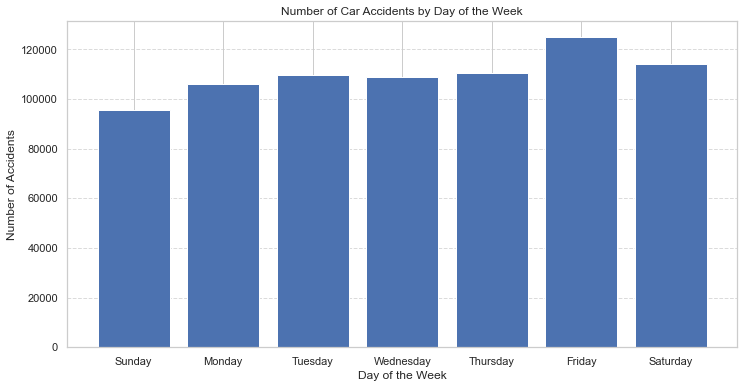

In [30]:
# Group the data by crash day of the week and count the number of accidents
day_of_week_crash_counts = crashes.groupby('CRASH_DAY_OF_WEEK').size()

# Define the day of the week labels for the x-axis
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(day_labels, day_of_week_crash_counts)
plt.title('Number of Car Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

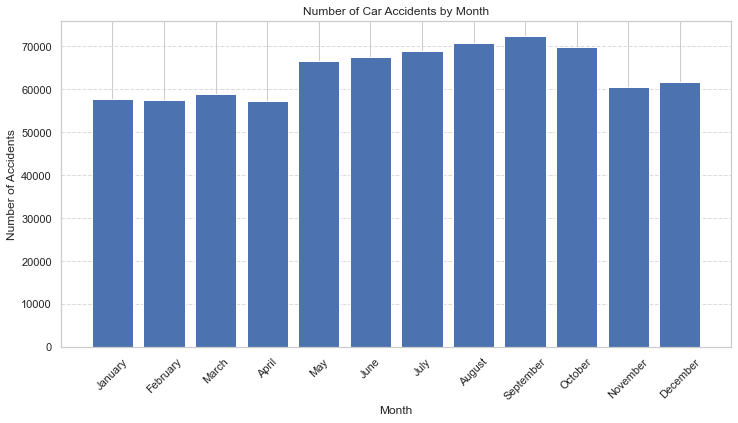

In [31]:
# Group the data by crash month and count the number of accidents
month_crash_counts = crashes.groupby('CRASH_MONTH').size()

# Define month labels for the x-axis
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(month_labels, month_crash_counts)
plt.title('Number of Car Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

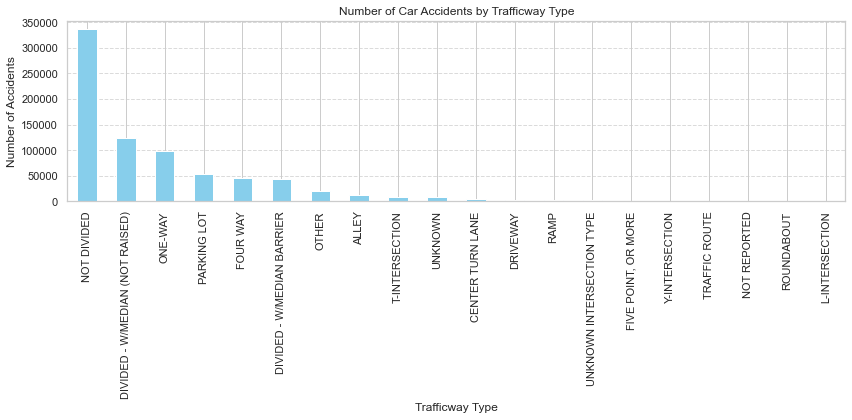

In [32]:
# Group the data by trafficway type and count the number of accidents
trafficway_crash_counts = crashes['TRAFFICWAY_TYPE'].value_counts()


# Plot the data
plt.figure(figsize=(12, 6))
trafficway_crash_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Car Accidents by Trafficway Type')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

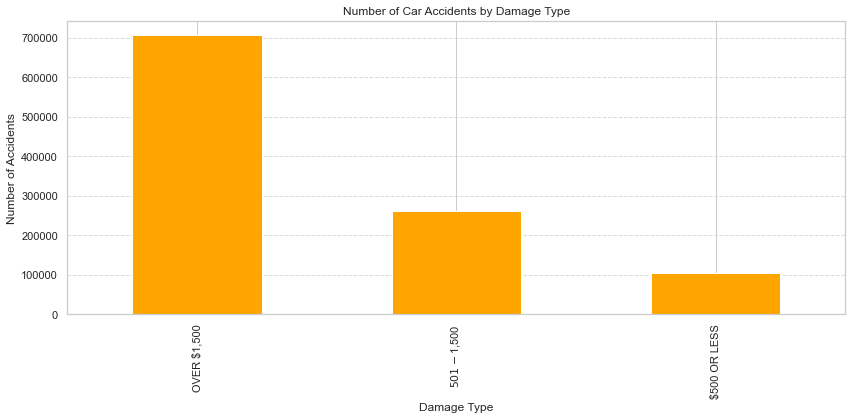

In [33]:
# Group the data by DAMAGE type and count the number of accidents
damage_counts = merged_data['DAMAGE'].value_counts()


# Plot the data
plt.figure(figsize=(12, 6))
damage_counts.plot(kind='bar', color='orange')
plt.title('Number of Car Accidents by Damage Type')
plt.xlabel('Damage Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

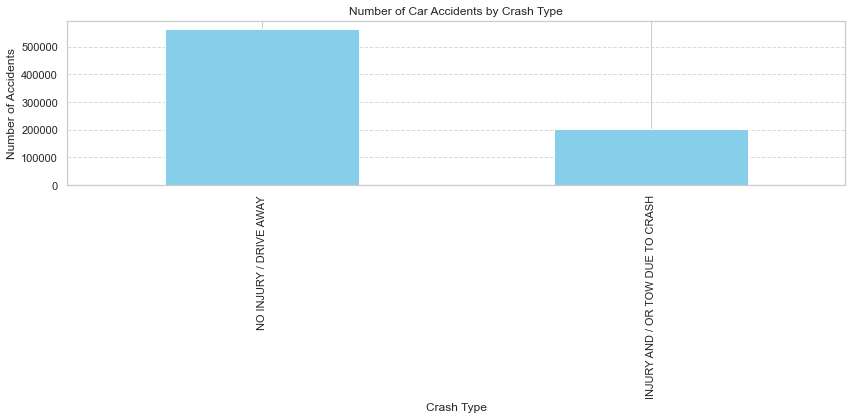

In [34]:
# Group the data by crash type and count the number of accidents
crash_type_counts = crashes['CRASH_TYPE'].value_counts()


# Plot the data
plt.figure(figsize=(12, 6))
crash_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Car Accidents by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

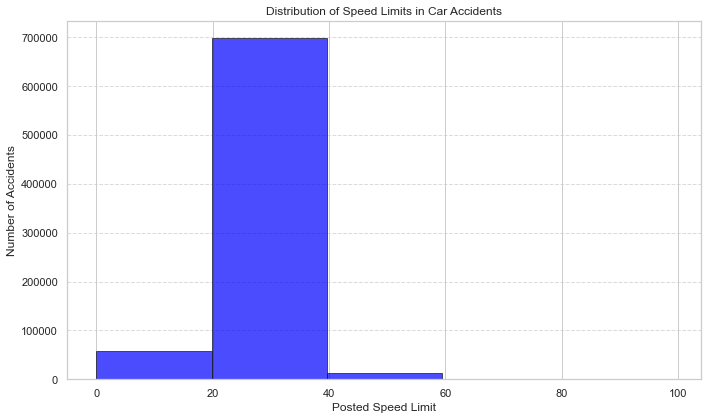

In [35]:
# Filter out rows with missing speed limit data
speed_limit_data = crashes.dropna(subset=['POSTED_SPEED_LIMIT'])

# Extract the speed limit column
speed_limit = speed_limit_data['POSTED_SPEED_LIMIT']

# Create a histogram of speed limits
plt.figure(figsize=(10, 6))
plt.hist(speed_limit, bins=5, edgecolor='k', alpha=0.7, color='blue')
plt.title('Distribution of Speed Limits in Car Accidents')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

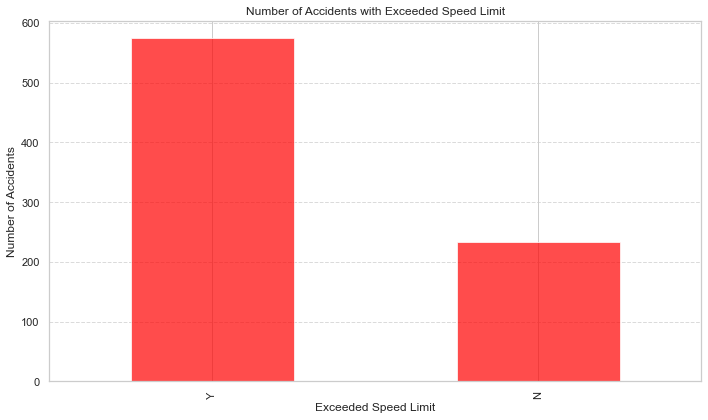

In [36]:
# Filter out rows with missing data for exceeded speed limit
exceeded_speed_data = merged_data.dropna(subset=['EXCEED_SPEED_LIMIT_I'])

# Extract the exceeded speed limit column
exceeded_speed_limit = exceeded_speed_data['EXCEED_SPEED_LIMIT_I']

# Count the number of accidents where speed limit was exceeded
exceeded_speed_counts = exceeded_speed_limit.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
exceeded_speed_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of Accidents with Exceeded Speed Limit')
plt.xlabel('Exceeded Speed Limit')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

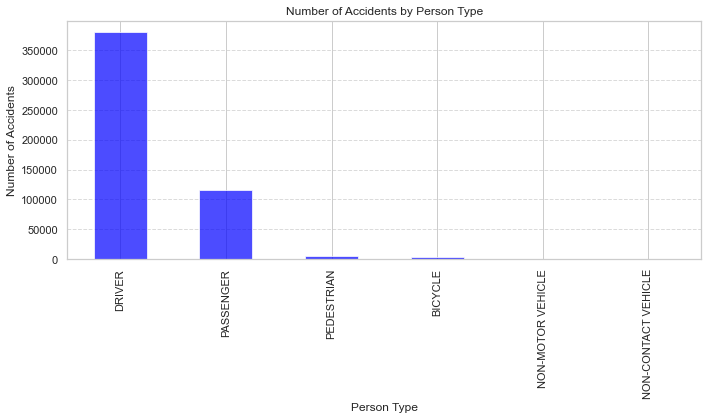

In [37]:
# Extract the person type column
person_type = people['PERSON_TYPE']

# Count the number of accidents by person type
person_type_counts = person_type.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
person_type_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Accidents by Person Type')
plt.xlabel('Person Type')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

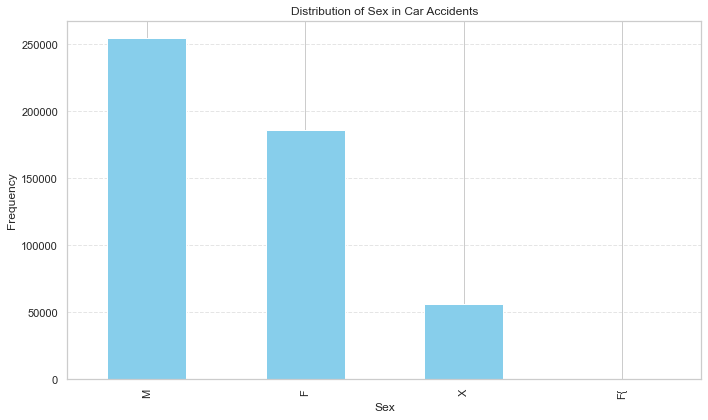

In [38]:
# Count the occurrences of each sex
sex_counts = people['SEX'].value_counts()

# Plot a bar graph for sex
plt.figure(figsize=(10, 6))
sex_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sex in Car Accidents')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

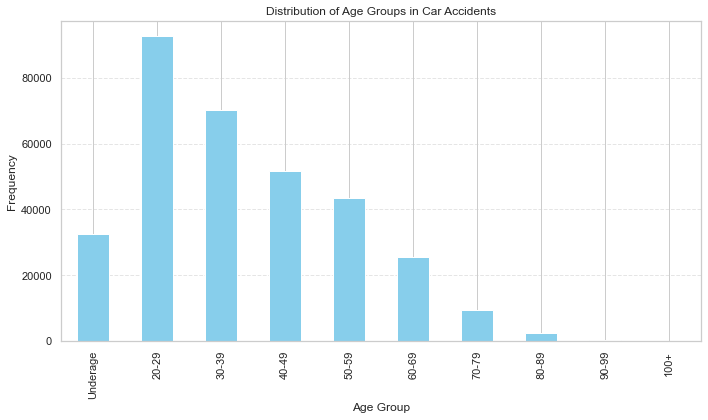

In [39]:
# Create bins for age groups
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['Underage','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

# Use pd.cut to categorize ages into bins
people['AGE_GROUP'] = pd.cut(people['AGE'], bins=age_bins, labels=age_labels)

# Plot a histogram for age groups
plt.figure(figsize=(10, 6))
people['AGE_GROUP'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups in Car Accidents')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

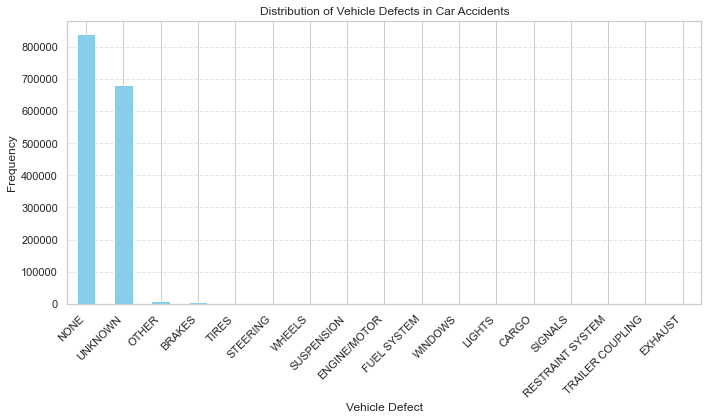

In [40]:
# Plot a bar chart for vehicle defects
plt.figure(figsize=(10, 6))
vehicles['VEHICLE_DEFECT'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Defects in Car Accidents')
plt.xlabel('Vehicle Defect')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

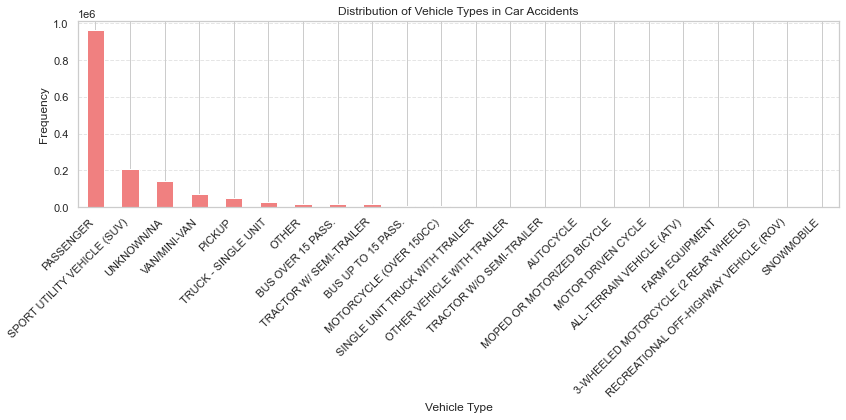

In [41]:
# Plot a bar chart for vehicle types
plt.figure(figsize=(12, 6))
vehicles['VEHICLE_TYPE'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Vehicle Types in Car Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

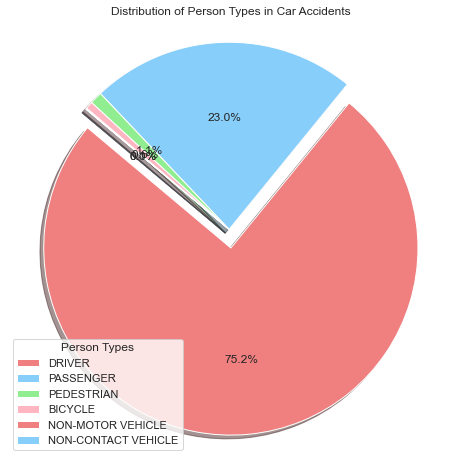

In [42]:
# Calculate the distribution of person types
person_type_counts = people['PERSON_TYPE'].value_counts()

# Create an 'explode' list to specify which slice to explode
explode = [0.1 if person_type == 'DRIVER' else 0 for person_type in person_type_counts.index]

# Plot a 2D pie chart
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
labels = person_type_counts.index

plt.pie(person_type_counts, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title('Distribution of Person Types in Car Accidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# add a legend
plt.legend(labels, loc="best", title="Person Types")

plt.show()

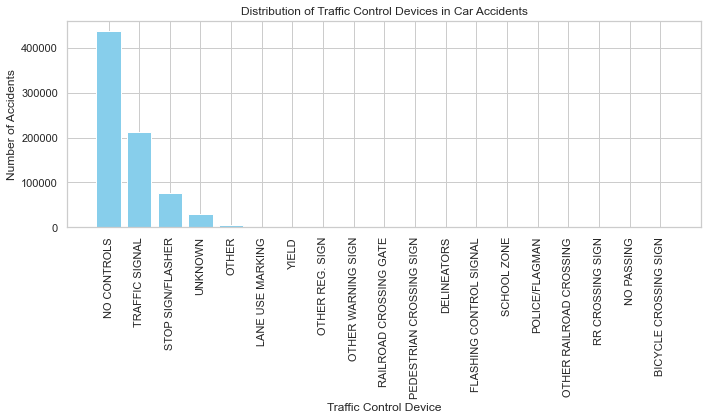

In [43]:
# Calculate the distribution of traffic control devices
traffic_control_device_counts = crashes['TRAFFIC_CONTROL_DEVICE'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(traffic_control_device_counts.index, traffic_control_device_counts.values, color='skyblue')
plt.xlabel('Traffic Control Device')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Traffic Control Devices in Car Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

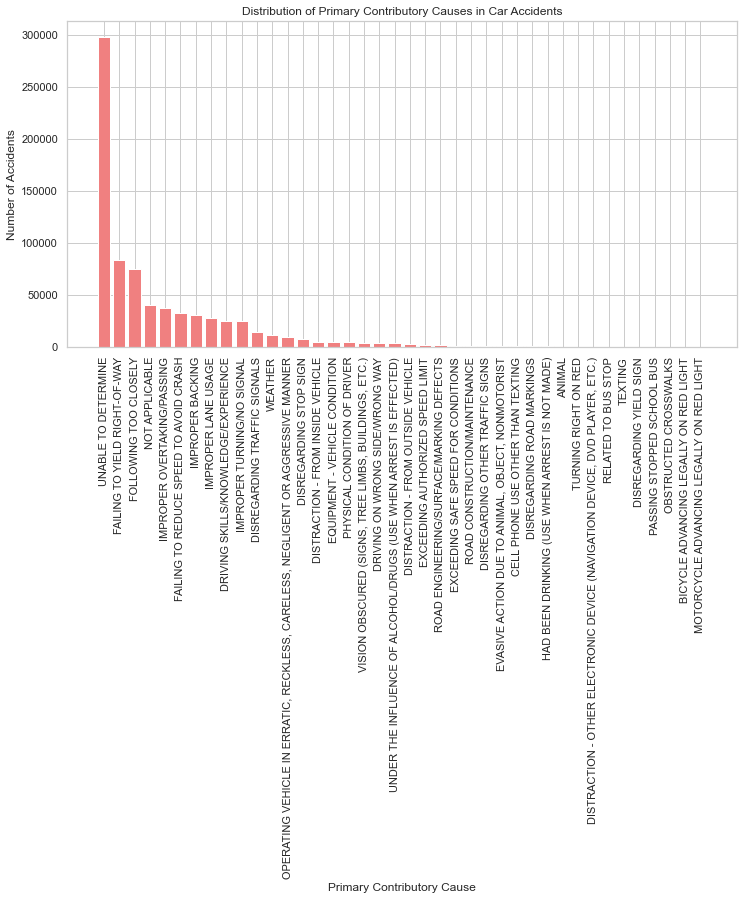

In [44]:
# Calculate the distribution of primary contributory causes
cause_counts = crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(cause_counts.index, cause_counts.values, color='lightcoral')
plt.xlabel('Primary Contributory Cause')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Primary Contributory Causes in Car Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility


plt.show()

In [45]:
# viewing the first few columns of the final dataset
final_data.head()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,SEX,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,VEHICLE_DEFECT,MANEUVER,UNIT_TYPE
0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,M,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER
1,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,M,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER
2,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,M,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER
3,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,M,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER
4,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,F,34.0,SAFETY BELT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,UNKNOWN,PASSING/OVERTAKING,DRIVER


In [46]:
# viewing the last few columns of the datasets
final_data.tail()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,SEX,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,VEHICLE_DEFECT,MANEUVER,UNIT_TYPE
801974,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,M,39.0,SAFETY BELT USED,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,NONE,LEAVING TRAFFIC LANE TO PARK,DRIVER
801975,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,X,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN/NA,DRIVER
801976,NO CONTROLS,CLEAR,DAYLIGHT,NO CONTROLS,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,...,X,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED,PARKED
801977,NO CONTROLS,CLEAR,DARKNESS,NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,...,F,33.0,USAGE UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,STRAIGHT AHEAD,DRIVER
801978,NO CONTROLS,CLEAR,DARKNESS,NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,...,F,33.0,USAGE UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED,PARKED


### Data Preprocessing
In the section, I viewed the value counts for each column and grouped the primary contributory causes because they were very many classes, I also checked for class imbalance. I converted categorical values into numerical values in order to work with them in buidling models for machine learning.

In [47]:
# Value counts
final_data["TRAFFIC_CONTROL_DEVICE"].value_counts()

NO CONTROLS                 414386
TRAFFIC SIGNAL              259836
STOP SIGN/FLASHER            90501
UNKNOWN                      26709
OTHER                         4873
YIELD                         1161
OTHER REG. SIGN                830
OTHER WARNING SIGN             604
PEDESTRIAN CROSSING SIGN       587
RAILROAD CROSSING GATE         558
FLASHING CONTROL SIGNAL        545
DELINEATORS                    424
OTHER RAILROAD CROSSING        243
POLICE/FLAGMAN                 220
SCHOOL ZONE                    199
RR CROSSING SIGN               191
LANE USE MARKING                60
NO PASSING                      38
BICYCLE CROSSING SIGN           14
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [48]:
# Value counts
final_data["DEVICE_CONDITION"].value_counts()

NO CONTROLS                 423221
FUNCTIONING PROPERLY        317124
UNKNOWN                      48743
OTHER                         6364
FUNCTIONING IMPROPERLY        3537
NOT FUNCTIONING               2698
WORN REFLECTIVE MATERIAL       202
MISSING                         90
Name: DEVICE_CONDITION, dtype: int64

In [49]:
# value counts
final_data["WEATHER_CONDITION"].value_counts()

CLEAR                       645245
RAIN                         61552
UNKNOWN                      35093
SNOW                         31023
CLOUDY/OVERCAST              22541
OTHER                         2409
FREEZING RAIN/DRIZZLE         2092
BLOWING SNOW                   730
SLEET/HAIL                     633
FOG/SMOKE/HAZE                 543
SEVERE CROSS WIND GATE         106
BLOWING SAND, SOIL, DIRT        12
Name: WEATHER_CONDITION, dtype: int64

In [50]:
# value counts
final_data["LIGHTING_CONDITION"].value_counts()

DAYLIGHT                  517470
DARKNESS, LIGHTED ROAD    186543
DARKNESS                   34169
UNKNOWN                    27626
DUSK                       23194
DAWN                       12977
Name: LIGHTING_CONDITION, dtype: int64

In [51]:
# value counts
final_data["TRAFFICWAY_TYPE"].value_counts()

NOT DIVIDED                        346112
DIVIDED - W/MEDIAN (NOT RAISED)    127430
ONE-WAY                             86997
FOUR WAY                            82797
DIVIDED - W/MEDIAN BARRIER          46437
PARKING LOT                         40327
OTHER                               17736
T-INTERSECTION                      16458
ALLEY                                9040
UNKNOWN                              8488
CENTER TURN LANE                     5773
UNKNOWN INTERSECTION TYPE            3908
RAMP                                 2121
FIVE POINT, OR MORE                  1926
Y-INTERSECTION                       1828
DRIVEWAY                             1800
TRAFFIC ROUTE                        1531
NOT REPORTED                          770
ROUNDABOUT                            294
L-INTERSECTION                        206
Name: TRAFFICWAY_TYPE, dtype: int64

In [52]:
# value counts
final_data["ALIGNMENT"].value_counts()

STRAIGHT AND LEVEL       782516
STRAIGHT ON GRADE         11136
CURVE, LEVEL               5084
STRAIGHT ON HILLCREST      1969
CURVE ON GRADE             1015
CURVE ON HILLCREST          259
Name: ALIGNMENT, dtype: int64

In [53]:
# value counts
final_data["ROADWAY_SURFACE_COND"].value_counts()

DRY                606072
WET                 97779
UNKNOWN             57342
SNOW OR SLUSH       33715
ICE                  4893
OTHER                2036
SAND, MUD, DIRT       142
Name: ROADWAY_SURFACE_COND, dtype: int64

In [54]:
# value counts
final_data["ROAD_DEFECT"].value_counts()

NO DEFECTS           653571
UNKNOWN              137519
OTHER                  3655
WORN SURFACE           2841
RUT, HOLES             2389
SHOULDER DEFECT        1549
DEBRIS ON ROADWAY       455
Name: ROAD_DEFECT, dtype: int64

In [55]:
# value counts
final_data["CRASH_TYPE"].value_counts()

NO INJURY / DRIVE AWAY              540121
INJURY AND / OR TOW DUE TO CRASH    261858
Name: CRASH_TYPE, dtype: int64

In [56]:
# value counts
final_data["PERSON_TYPE"].value_counts()

DRIVER                 793955
PEDESTRIAN               4395
BICYCLE                  3257
NON-MOTOR VEHICLE         228
NON-CONTACT VEHICLE       144
Name: PERSON_TYPE, dtype: int64

In [57]:
# value counts
final_data["SEX"].value_counts()

M    424566
F    268865
X    108548
Name: SEX, dtype: int64

In [58]:
# value counts
final_data["AGE"].value_counts()

34.0     250360
25.0      16980
27.0      16647
26.0      16635
29.0      16519
          ...  
103.0         9
100.0         9
101.0         7
102.0         4
104.0         2
Name: AGE, Length: 105, dtype: int64

In [59]:
# value counts
final_data["SAFETY_EQUIPMENT"].value_counts()

USAGE UNKNOWN                                 420461
SAFETY BELT USED                              352146
NONE PRESENT                                   20369
HELMET NOT USED                                 3424
SAFETY BELT NOT USED                            2914
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      1192
DOT COMPLIANT MOTORCYCLE HELMET                  990
NOT DOT COMPLIANT MOTORCYCLE HELMET              196
SHOULD/LAP BELT USED IMPROPERLY                  186
WHEELCHAIR                                        52
HELMET USED                                       33
CHILD RESTRAINT USED                               9
CHILD RESTRAINT - FORWARD FACING                   4
CHILD RESTRAINT - TYPE UNKNOWN                     1
BOOSTER SEAT                                       1
STRETCHER                                          1
Name: SAFETY_EQUIPMENT, dtype: int64

In [60]:
# value counts
final_data["INJURY_CLASSIFICATION"].value_counts()

NO INDICATION OF INJURY     737399
NONINCAPACITATING INJURY     37819
REPORTED, NOT EVIDENT        19472
INCAPACITATING INJURY         6802
FATAL                          487
Name: INJURY_CLASSIFICATION, dtype: int64

In [61]:
# value counts
final_data["DRIVER_ACTION"].value_counts()

NONE                                 276766
UNKNOWN                              226677
OTHER                                 72226
FAILED TO YIELD                       64802
FOLLOWED TOO CLOSELY                  43169
IMPROPER BACKING                      21461
IMPROPER TURN                         19440
IMPROPER LANE CHANGE                  17815
DISREGARDED CONTROL DEVICES           17179
IMPROPER PASSING                      17122
TOO FAST FOR CONDITIONS               12858
WRONG WAY/SIDE                         4029
IMPROPER PARKING                       2646
OVERCORRECTED                          2174
EVADING POLICE VEHICLE                 1355
CELL PHONE USE OTHER THAN TEXTING      1061
EMERGENCY VEHICLE ON CALL               769
TEXTING                                 318
STOPPED SCHOOL BUS                       74
LICENSE RESTRICTIONS                     38
Name: DRIVER_ACTION, dtype: int64

In [62]:
# value counts
final_data["DRIVER_VISION"].value_counts()

UNKNOWN                   410830
NOT OBSCURED              374505
OTHER                       6835
MOVING VEHICLES             3715
PARKED VEHICLES             2830
WINDSHIELD (WATER/ICE)      1752
BLINDED - SUNLIGHT           755
TREES, PLANTS                306
BUILDINGS                    209
EMBANKMENT                    60
BLINDED - HEADLIGHTS          58
HILLCREST                     57
BLOWING MATERIALS             51
SIGNBOARD                     16
Name: DRIVER_VISION, dtype: int64

In [63]:
# value counts
final_data["PHYSICAL_CONDITION"].value_counts()

NORMAL                          501528
UNKNOWN                         284301
IMPAIRED - ALCOHOL                3956
REMOVED BY EMS                    2612
OTHER                             2551
FATIGUED/ASLEEP                   2338
EMOTIONAL                         2213
ILLNESS/FAINTED                    849
HAD BEEN DRINKING                  598
IMPAIRED - DRUGS                   527
IMPAIRED - ALCOHOL AND DRUGS       394
MEDICATED                          112
Name: PHYSICAL_CONDITION, dtype: int64

In [64]:
# value counts
final_data["UNIT_TYPE"].value_counts()

DRIVER                 721131
PARKED                  76595
DRIVERLESS               4102
NON-CONTACT VEHICLE        88
DISABLED VEHICLE           63
Name: UNIT_TYPE, dtype: int64

In [65]:
# value counts
final_data["VEHICLE_DEFECT"].value_counts()

NONE                414758
UNKNOWN             379312
OTHER                 3683
BRAKES                2823
TIRES                  379
STEERING               351
WHEELS                 189
SUSPENSION             137
ENGINE/MOTOR           117
FUEL SYSTEM             70
LIGHTS                  48
WINDOWS                 32
SIGNALS                 27
CARGO                   25
TRAILER COUPLING        10
RESTRAINT SYSTEM         9
EXHAUST                  9
Name: VEHICLE_DEFECT, dtype: int64

In [66]:
# value counts
final_data["MANEUVER"].value_counts()

STRAIGHT AHEAD                        407153
PARKED                                 77760
SLOW/STOP IN TRAFFIC                   68842
UNKNOWN/NA                             53335
TURNING LEFT                           52280
BACKING                                26732
TURNING RIGHT                          25990
PASSING/OVERTAKING                     19837
CHANGING LANES                         14392
OTHER                                  14103
ENTERING TRAFFIC LANE FROM PARKING      9152
MERGING                                 5376
U-TURN                                  5098
STARTING IN TRAFFIC                     5042
AVOIDING VEHICLES/OBJECTS               3167
ENTER FROM DRIVE/ALLEY                  3152
SKIDDING/CONTROL LOSS                   2978
LEAVING TRAFFIC LANE TO PARK            2657
PARKED IN TRAFFIC LANE                  1698
DRIVING WRONG WAY                       1402
NEGOTIATING A CURVE                      907
TURNING ON RED                           395
DRIVERLESS

In [67]:
# value counts
final_data["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

UNABLE TO DETERMINE                                                                 297929
FAILING TO YIELD RIGHT-OF-WAY                                                        92980
FOLLOWING TOO CLOSELY                                                                84724
FAILING TO REDUCE SPEED TO AVOID CRASH                                               43529
IMPROPER OVERTAKING/PASSING                                                          40485
NOT APPLICABLE                                                                       35989
IMPROPER LANE USAGE                                                                  27941
IMPROPER TURNING/NO SIGNAL                                                           27328
IMPROPER BACKING                                                                     24788
DISREGARDING TRAFFIC SIGNALS                                                         24308
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22771

In [68]:
# The features in the primary contibutory cause column are too many which has prompted us to categorize then into 5 groups
Driver_related = ['FAILING TO YIELD RIGHT-OF-WAY', 
                  'FOLLOWING TOO CLOSELY', 
                  'IMPROPER OVERTAKING/PASSING', 
                  'FAILING TO REDUCE SPEED TO AVOID CRASH', 
                  'IMPROPER BACKING', 
                  'IMPROPER LANE USAGE', 
                  'IMPROPER TURNING/NO SIGNAL', 
                  'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',         
                  'DISREGARDING TRAFFIC SIGNALS',
                  'DISREGARDING STOP SIGN',  
                  'DRIVING ON WRONG SIDE/WRONG WAY', 
                  'TEXTING', 
                  'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST'
                  'DISREGARDING TRAFFIC SIGNS', 
                  'DISREGARDING ROAD MARKINGS', 
                  'TURNING RIGHT ON RED', 
                  'RELATED TO BUS STOP',
                  'DISREGARDING YIELD SIGN',
                  'PHYSICAL CONDITION OF DRIVER', 
                  'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',   
                  'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)']

Environmental_causes = ['WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 
                        'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 
                        'OBSTRUCTED CROSSWALKS']

Vehicle_related = ['EQUIPMENT-VEHICLE CONDITION', 'EXCEEDING SAFE SPEED FOR CONDITIONS']

Traffic_related = ['EXCEEDING AUTHORIZED SPEED LIMIT', 'ROAD CONSTRUCTION/MAINTENANCE', 
                   'RELATED TO BUS STOP', 'PASSING STOPPED SCHOOL BUS'
                   'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT']

Others = ['UNABLE TO DETERMINE', 'NOT APPLICABLE', 'ANIMAL']

# Helper function to rename the values in the column according to the categorization
def crash_cause(val):
    if val in Driver_related:
        return 'Driver_related'
    elif val in Environmental_causes:
        return 'Environmental_causes'
    elif val in Vehicle_related:
        return 'Vehicle_related'
    elif val in Traffic_related:
        return 'Traffic_related'
    else:
        return 'Other'

final_data['TARGET1'] = final_data['PRIM_CONTRIBUTORY_CAUSE'].map(crash_cause)

In [69]:
final_data.head()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,VEHICLE_DEFECT,MANEUVER,UNIT_TYPE,TARGET1
0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related
1,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER,Driver_related
2,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related
3,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER,Driver_related
4,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,SAFETY BELT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related


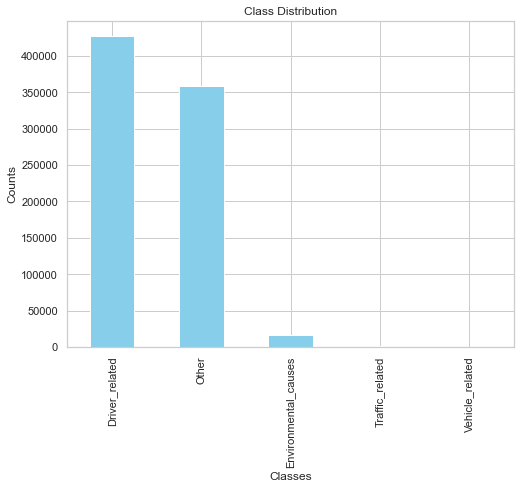

Class Counts:
Driver_related          426690
Other                   357900
Environmental_causes     16279
Traffic_related           1011
Vehicle_related             99
Name: TARGET1, dtype: int64


In [70]:
# Checking for Class imbalance
target_column = 'TARGET1'

# Count the number of instances for each class in the target variable
class_counts = final_data[target_column].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

# Output the class counts
print("Class Counts:")
print(class_counts)

Since my data is imbalanced I decided to group the environmental causes, traffic related and vehicle related into one category called "Others"

In [71]:
# The features in the primary contibutory cause column are too many which has prompted us to categorize then into 5 groups
Driver_related = ['FAILING TO YIELD RIGHT-OF-WAY', 
                  'FOLLOWING TOO CLOSELY', 
                  'IMPROPER OVERTAKING/PASSING', 
                  'FAILING TO REDUCE SPEED TO AVOID CRASH', 
                  'IMPROPER BACKING', 
                  'IMPROPER LANE USAGE', 
                  'IMPROPER TURNING/NO SIGNAL', 
                  'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',         
                  'DISREGARDING TRAFFIC SIGNALS',
                  'DISREGARDING STOP SIGN',  
                  'DRIVING ON WRONG SIDE/WRONG WAY', 
                  'TEXTING', 
                  'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST'
                  'DISREGARDING TRAFFIC SIGNS', 
                  'DISREGARDING ROAD MARKINGS', 
                  'TURNING RIGHT ON RED', 
                  'DISREGARDING YIELD SIGN',
                  'PHYSICAL CONDITION OF DRIVER', 
                  'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',   
                  'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                  'EXCEEDING SAFE SPEED FOR CONDITIONS',
                  'EXCEEDING AUTHORIZED SPEED LIMIT',]

Others = ['UNABLE TO DETERMINE', 'NOT APPLICABLE',
          'WEATHER',            
          'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 
          'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 
          'OBSTRUCTED CROSSWALKS',
          'EQUIPMENT-VEHICLE CONDITION',  
          'ROAD CONSTRUCTION/MAINTENANCE', 
          'RELATED TO BUS STOP', 
          'PASSING STOPPED SCHOOL BUS'
          'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
          'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
          'RELATED TO BUS STOP',
          'ANIMAL']

# Helper function to rename the values in the column according to the categorization
def crash_cause(val):
    if val in Driver_related:
        return 'Driver_related'
    else:
        return 'Others'

final_data['TARGET2'] = final_data['PRIM_CONTRIBUTORY_CAUSE'].map(crash_cause)

In [72]:
final_data.head()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,VEHICLE_DEFECT,MANEUVER,UNIT_TYPE,TARGET1,TARGET2
0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related,Driver_related
1,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER,Driver_related,Driver_related
2,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related,Driver_related
3,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER,Driver_related,Driver_related
4,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,SAFETY BELT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related,Driver_related


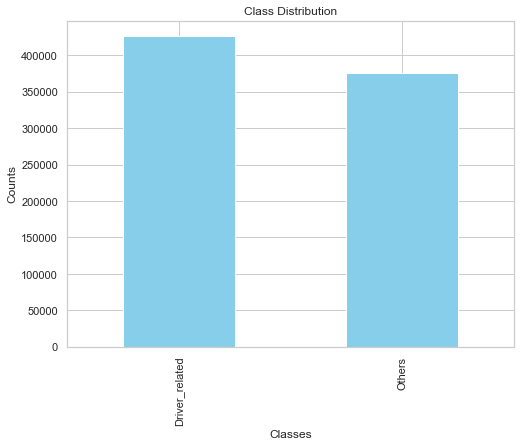

Class Counts:
Driver_related    426489
Others            375490
Name: TARGET2, dtype: int64


In [73]:
# Checking for Class imbalance
target_column2 = 'TARGET2'

# Count the number of instances for each class in the target variable
class_counts = final_data[target_column2].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

# Output the class counts
print("Class Counts:")
print(class_counts)

In [74]:
# our data is more balanced this way

In [75]:
final_data = final_data.drop('TARGET1', axis=1)

In [76]:
# Rename the target column
final_data = final_data.rename(columns={'TARGET2' : 'TARGET'})
final_data.head()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,VEHICLE_DEFECT,MANEUVER,UNIT_TYPE,TARGET
0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related
1,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER,Driver_related
2,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related
3,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,USAGE UNKNOWN,NO INDICATION OF INJURY,IMPROPER PASSING,UNKNOWN,UNKNOWN,NONE,STRAIGHT AHEAD,DRIVER,Driver_related
4,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,34.0,SAFETY BELT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,UNKNOWN,PASSING/OVERTAKING,DRIVER,Driver_related


In [77]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801979 entries, 0 to 801978
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DEVICE_CONDITION         801979 non-null  object 
 1   WEATHER_CONDITION        801979 non-null  object 
 2   LIGHTING_CONDITION       801979 non-null  object 
 3   TRAFFIC_CONTROL_DEVICE   801979 non-null  object 
 4   TRAFFICWAY_TYPE          801979 non-null  object 
 5   ALIGNMENT                801979 non-null  object 
 6   ROADWAY_SURFACE_COND     801979 non-null  object 
 7   ROAD_DEFECT              801979 non-null  object 
 8   CRASH_TYPE               801979 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  801979 non-null  object 
 10  PERSON_TYPE              801979 non-null  object 
 11  SEX                      801979 non-null  object 
 12  AGE                      801979 non-null  float64
 13  SAFETY_EQUIPMENT         801979 non-null  object 
 14  INJU

In [78]:
# select the specific columns that need one-hot encoding
columns_to_encode = ['DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFIC_CONTROL_DEVICE',
                     'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
                     'PRIM_CONTRIBUTORY_CAUSE', 'PERSON_TYPE', 'SEX', 'SAFETY_EQUIPMENT',
                     'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
                     'PHYSICAL_CONDITION', 'VEHICLE_DEFECT', 'MANEUVER', 'UNIT_TYPE']

# Apply one-hot encoding to the selected columns
df_encoded = pd.get_dummies(final_data, columns=columns_to_encode)

# 'df_encoded' now contains one-hot encoded columns
df_encoded.head()

,AGE,TARGET,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,...,MANEUVER_TURNING LEFT,MANEUVER_TURNING ON RED,MANEUVER_TURNING RIGHT,MANEUVER_U-TURN,MANEUVER_UNKNOWN/NA,UNIT_TYPE_DISABLED VEHICLE,UNIT_TYPE_DRIVER,UNIT_TYPE_DRIVERLESS,UNIT_TYPE_NON-CONTACT VEHICLE,UNIT_TYPE_PARKED
0,34.0,Driver_related,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,34.0,Driver_related,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,34.0,Driver_related,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,34.0,Driver_related,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,34.0,Driver_related,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Analysis
After analizing the encoded dataframe, i cannot work with the 254 columns, and so i have decided to change the variables manually.

In [79]:
# List containing whether a traffic control or warning sign was present in the area.
devices = ['TRAFFIC SIGNAL', 
           'STOP SIGN/FLASHER', 
           'OTHER', 
           'LANE USE MARKING', 
           'YIELD', 
           'OTHER REG. SIGN',
           'OTHER WARNING SIGN', 
           'RAILROAD CROSSING GATE', 
           'PEDESTRIAN CROSSING SIGN', 
           'POLICE/FLAGMAN', 
           'SCHOOL ZONE',
           'DELINEATORS', 
           'FLASHING CONTROL SIGNAL', 
           'BICYCLE CROSSING SIGN', 
           'NO PASSING', 
           'RR CROSSING SIGN',
           'OTHER RAILROAD CROSSING']

# List containing if the Device was functioning
working_devices = ['FUNCTIONING PROPERLY', 'WORN REFLECTIVE MATERIAL']

# List containing bad weather elements
bad_weather_cond = ['RAIN', 
                    'SNOW', 
                    'FOG/SMOKE/HAZE', 
                    'SLEET/HAIL', 
                    'FREEZING RAIN/DRIZZLE', 
                    'BLOWING SNOW',
                    'SEVERE CROSS WIND GATE', 
                    'BLOWING SAND, SOIL, DIRT',
                    'CLOUDY/OVERCAST']


vehicle_defect = ['BRAKES',
                  'TIRES',                  
                  'STEERING',              
                  'WHEELS',                 
                  'SUSPENSION',
                  'ENGINE/MOTOR',
                  'FUEL SYSTEM', 
                  'LIGHTS',
                  'WINDOWS',
                  'SIGNALS',
                  'CARGO', 
                  'TRAILER COUPLING',
                  'RESTRAINT SYSTEM',
                  'EXHAUST']

road_defects = ['NO DEFECTS', 'RUT, HOLES', 'SHOULDER DEFECT', 'OTHER', 'WORN SURFACE', 'DEBRIS ON ROADWAY']

# helper functions
def device_working(val):
    if val in working_devices:
        return 1
    else:
        return 0

def device_present(val):
    if val in devices:
        return 1
    else:
        return 0
    
def classify_vehicle_defect(val):
    if val in vehicle_defect:
        return 1
    else:
        return 0


def classify_road_defect(val):
    if val in road_defects:
        return 1
    else:
        return 0


def bad_weather(val):
    if val in bad_weather_cond:
        return 1
    else:
        return 0
    
crash_types = ['INJURY AND / OR TOW DUE TO CRASH']

def classify_crash_type(val):
    if val in crash_types:
        return 1
    else:
        return 0


safety_equipment = ['SAFETY BELT USED', 
                    'CHILD RESTRAINT USED',
                    'HELMET USED',
                    'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)',
                    'WHEELCHAIR',
                    'CHILD RESTRAINT - FORWARD FACING',
                    'CHILD RESTRAINT - TYPE UNKNOWN',
                    'BOOSTER SEAT',
                    'STRETCHER']



def classify_safety_equipment(val):
    if val in safety_equipment:
        return 1
    else:
        return 0


injury_classifications = ['NONINCAPACITATING INJURY',  
                          'INCAPACITATING INJURY', 
                          'FATAL']

def classify_injury_classification(val):
    if val in injury_classifications:
        return 1
    else:
        return 0


bad_lighting = ['DARKNESS', 'DUSK', 'DAWN']  
                     

driver_vision = ['OTHER', 
                 'MOVING VEHICLES', 
                 'PARKED VEHICLES', 
                 'WINDSHIELD (WATER/ICE)',
                 'BLINDED - SUNLIGHT',
                 'TREES, PLANTS',
                 'BUILDINGS',
                 'EMBANKMENT',
                 'BLINDED - HEADLIGHTS',
                 'HILLCREST',
                 'BLOWING MATERIALS',
                 'SIGNBOARD' ]
def poor_visibility(val, c):
    if val in bad_lighting:
        return 1
    elif val in driver_vision:
        return 1
    else: 
        return 0
    
    
bad_road = ['WET', 'SNOW OR SLUSH', 'ICE', 'OTHER', 'SAND, MUD, DIRT']

def classify_bad_road(val):
    if val in bad_road:
        return 1
    else: 
        return 0

driver_action = ['OTHER',
                 'FAILED TO YIELD',
                 'FOLLOWED TOO CLOSELY',
                 'IMPROPER BACKING',
                 'IMPROPER TURN',
                 'IMPROPER LANE CHANGE',
                 'DISREGARDED CONTROL DEVICES',
                 'IMPROPER PASSING',
                 'TOO FAST FOR CONDITIONS',
                 'WRONG WAY/SIDE',
                 'IMPROPER PARKING',
                 'OVERCORRECTED',
                 'EVADING POLICE VEHICLE',
                 'CELL PHONE USE OTHER THAN TEXTING',
                 'EMERGENCY VEHICLE ON CALL',
                 'TEXTING',
                 'STOPPED SCHOOL BUS',
                 'LICENSE RESTRICTIONS']

physical_condition = ['IMPAIRED - ALCOHOL',
                      'OTHER',
                      'FATIGUED/ASLEEP',
                      'EMOTIONAL',
                      'ILLNESS/FAINTED',
                      'HAD BEEN DRINKING',
                      'IMPAIRED - DRUGS',
                      'IMPAIRED - ALCOHOL AND DRUGS',
                      'MEDICATED']

maneuver = ['STRAIGHT AHEAD',
    'TURNING LEFT',
    'TURNING RIGHT',
    'PASSING/OVERTAKING',
    'CHANGING LANES',
    'ENTERING TRAFFIC LANE FROM PARKING',
    'MERGING',
    'U-TURN',
    'STARTING IN TRAFFIC',
    'AVOIDING VEHICLES/OBJECTS',
    'ENTER FROM DRIVE/ALLEY',
    'SKIDDING/CONTROL LOSS',
    'LEAVING TRAFFIC LANE TO PARK',
    'PARKED IN TRAFFIC LANE',
    'DRIVING WRONG WAY',
    'NEGOTIATING A CURVE',
    'TURNING ON RED',]

def classify_driver_error(val, a, b):
    if val in maneuver:
        return 1
    elif val in physical_condition:
        return 1
    elif val in driver_action:
        return 1
    else:
        return 0


In [80]:
# Manually encoding the data into numerical format.
final_data['DEV_WORK'] = final_data['DEVICE_CONDITION'].apply(device_working)
final_data['TC_DEV'] = final_data['TRAFFIC_CONTROL_DEVICE'].apply(device_present)
final_data['WEA_CON'] = final_data['WEATHER_CONDITION'].apply(bad_weather)
final_data['BAD_ROAD'] = final_data['ROADWAY_SURFACE_COND'].apply(classify_bad_road)
final_data['ROAD_DEF'] = final_data['ROAD_DEFECT'].apply(classify_road_defect)
final_data['INJURY'] = final_data['INJURY_CLASSIFICATION'].apply(classify_injury_classification)
final_data['SAFETY_PRESENT'] = final_data['SAFETY_EQUIPMENT'].apply(classify_safety_equipment)
final_data['CRASH_TY'] = final_data['CRASH_TYPE'].apply(classify_crash_type)
final_data['VEH_COND'] = final_data['VEHICLE_DEFECT'].apply(classify_vehicle_defect)
final_data['DRIVER_ERROR'] = final_data.apply(lambda row: classify_driver_error(row['DRIVER_ACTION'], 
                                                                      row['PHYSICAL_CONDITION'], row['MANEUVER']), axis=1)
final_data['POOR_VISIBILITY'] = final_data.apply(lambda row: poor_visibility(row['LIGHTING_CONDITION'],
                                                                             row['DRIVER_VISION']), axis=1)

In [81]:
final_data.head()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,...,TC_DEV,WEA_CON,BAD_ROAD,ROAD_DEF,INJURY,SAFETY_PRESENT,CRASH_TY,VEH_COND,DRIVER_ERROR,POOR_VISIBILITY
0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,0,0,1,1,0,0,0,0,1,0
1,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,0,0,1,1,0,0,0,0,1,0
2,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,0,0,1,1,0,0,0,0,1,0
3,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,0,0,1,1,0,0,0,0,1,0
4,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,...,0,0,1,1,0,1,0,0,0,0


In [82]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801979 entries, 0 to 801978
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DEVICE_CONDITION         801979 non-null  object 
 1   WEATHER_CONDITION        801979 non-null  object 
 2   LIGHTING_CONDITION       801979 non-null  object 
 3   TRAFFIC_CONTROL_DEVICE   801979 non-null  object 
 4   TRAFFICWAY_TYPE          801979 non-null  object 
 5   ALIGNMENT                801979 non-null  object 
 6   ROADWAY_SURFACE_COND     801979 non-null  object 
 7   ROAD_DEFECT              801979 non-null  object 
 8   CRASH_TYPE               801979 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  801979 non-null  object 
 10  PERSON_TYPE              801979 non-null  object 
 11  SEX                      801979 non-null  object 
 12  AGE                      801979 non-null  float64
 13  SAFETY_EQUIPMENT         801979 non-null  object 
 14  INJU

In [83]:
# Analysis of the trafficway type column
columns_to_extract = ['TARGET', 'TRAFFICWAY_TYPE']
traffic_df = final_data[columns_to_extract].copy()
traffic_df.head()

,TARGET,TRAFFICWAY_TYPE
0,Driver_related,NOT DIVIDED
1,Driver_related,NOT DIVIDED
2,Driver_related,NOT DIVIDED
3,Driver_related,NOT DIVIDED
4,Driver_related,NOT DIVIDED


In [84]:
col = ['TRAFFICWAY_TYPE']
tdf = pd.get_dummies(traffic_df, columns=col)
tdf.head()

,TARGET,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,...,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION
0,Driver_related,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Driver_related,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Driver_related,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Driver_related,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Driver_related,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
tdf['TARGET'] = np.where(final_data['TARGET'] == "Driver_related", 1, 0)

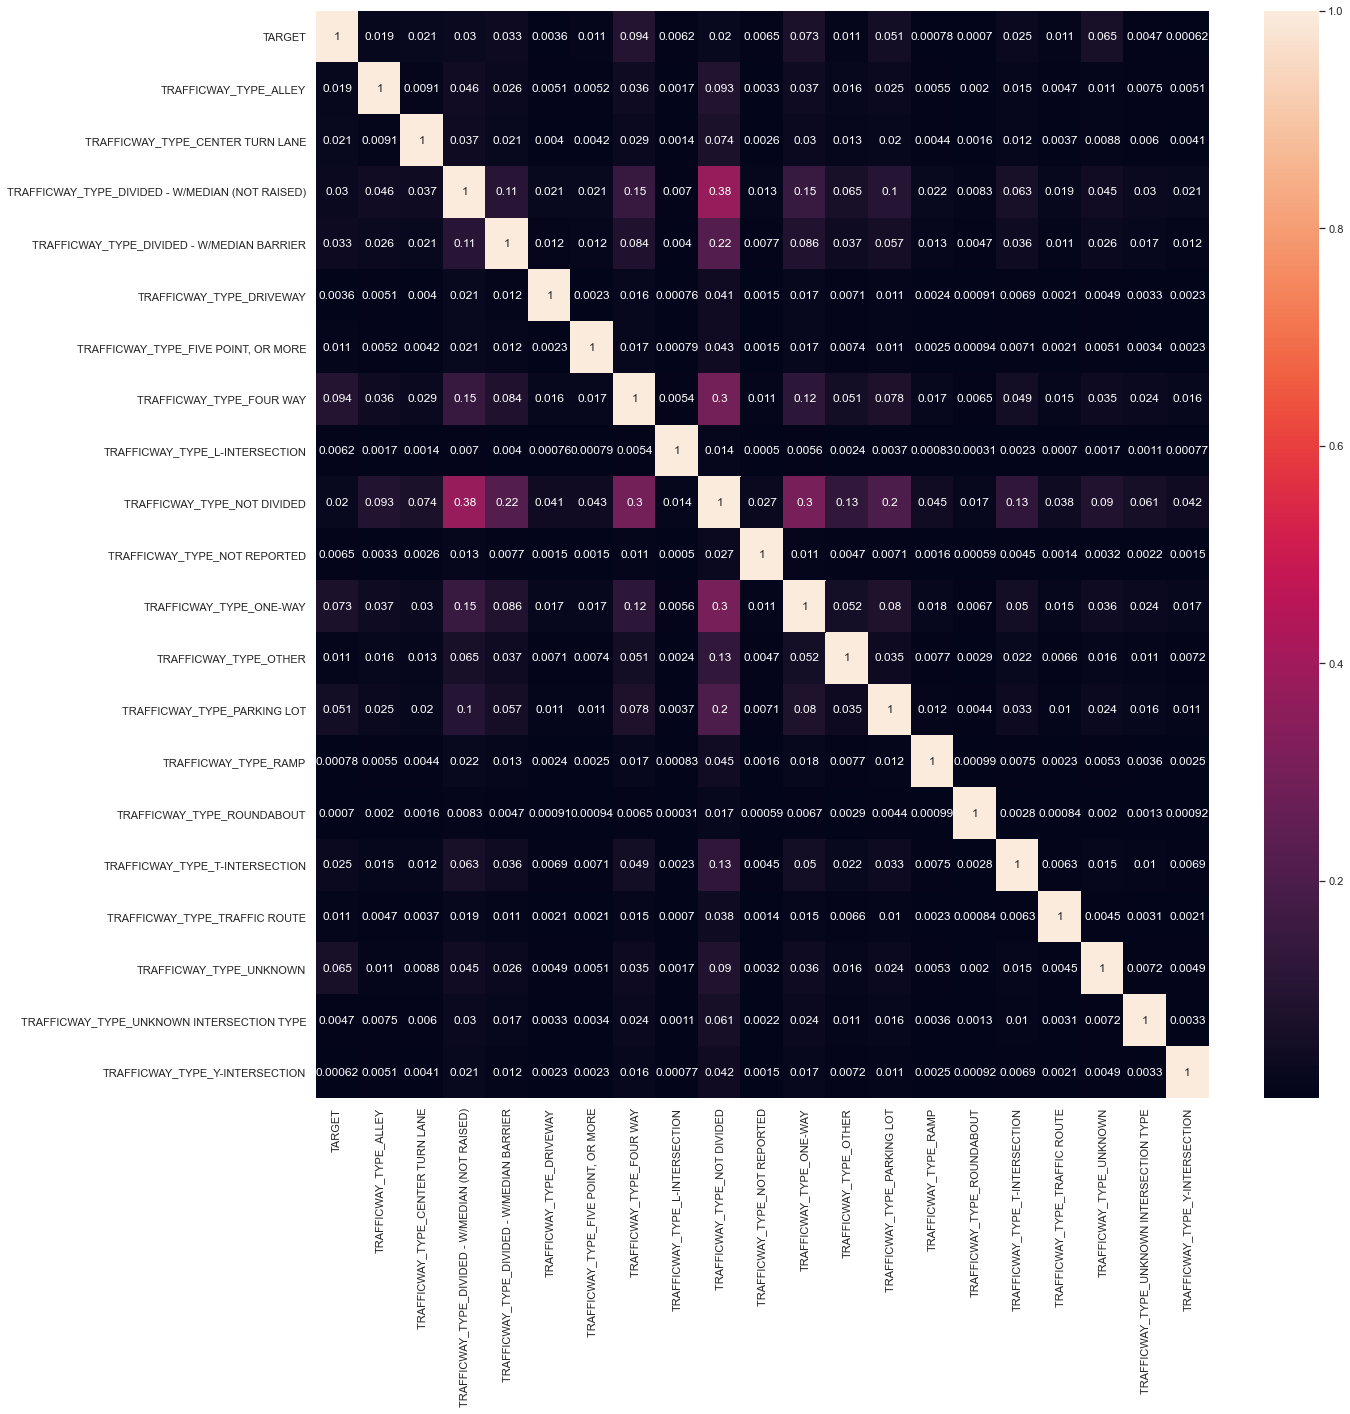

In [86]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(tdf.corr().abs(),annot=True);

In [87]:
# Analysis of the alignment column
columns_align = ['TARGET', 'ALIGNMENT']
align_df = final_data[columns_align].copy()
align_df.head()

,TARGET,ALIGNMENT
0,Driver_related,STRAIGHT AND LEVEL
1,Driver_related,STRAIGHT AND LEVEL
2,Driver_related,STRAIGHT AND LEVEL
3,Driver_related,STRAIGHT AND LEVEL
4,Driver_related,STRAIGHT AND LEVEL


In [88]:
coll = ['ALIGNMENT']
adf = pd.get_dummies(align_df, columns=coll)
adf.head()

,TARGET,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST
0,Driver_related,0,0,0,1,0,0
1,Driver_related,0,0,0,1,0,0
2,Driver_related,0,0,0,1,0,0
3,Driver_related,0,0,0,1,0,0
4,Driver_related,0,0,0,1,0,0


In [89]:
adf['TARGET'] = np.where(final_data['TARGET'] == "Driver_related", 1, 0)

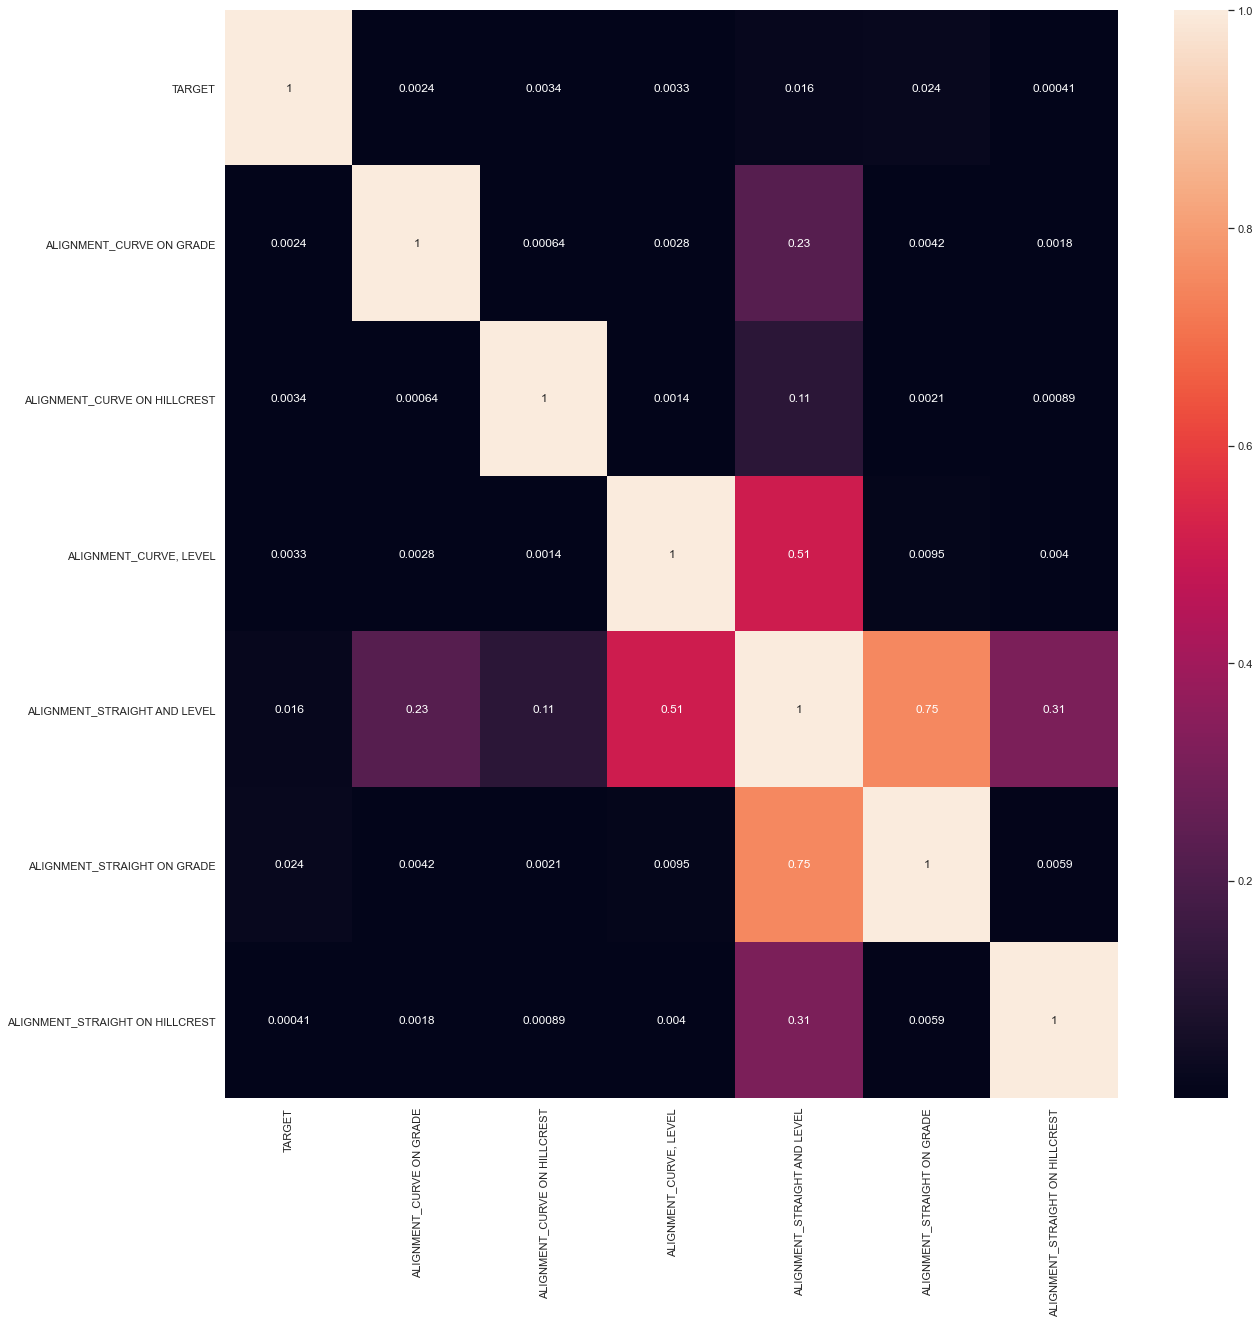

In [90]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(adf.corr().abs(),annot=True);

In [91]:
# selecting the numerical columns that i manually encoded earlier
numerical_columns = final_data.select_dtypes(include=['int64', 'float64'])
numerical_df = final_data[numerical_columns.columns]

In [92]:
numerical_df.head()

,AGE,DEV_WORK,TC_DEV,WEA_CON,BAD_ROAD,ROAD_DEF,INJURY,SAFETY_PRESENT,CRASH_TY,VEH_COND,DRIVER_ERROR,POOR_VISIBILITY
0,34.0,0,0,0,1,1,0,0,0,0,1,0
1,34.0,0,0,0,1,1,0,0,0,0,1,0
2,34.0,0,0,0,1,1,0,0,0,0,1,0
3,34.0,0,0,0,1,1,0,0,0,0,1,0
4,34.0,0,0,0,1,1,0,1,0,0,0,0


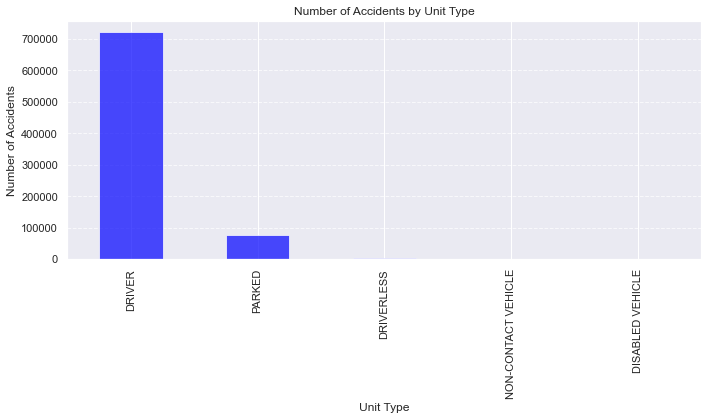

In [93]:
# Analysis of the unit type column
# Extract the unit type column
unit_type = final_data['UNIT_TYPE']

# Count the number of accidents by unit type
unit_type_counts = unit_type.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
unit_type_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Accidents by Unit Type')
plt.xlabel('Unit Type')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [94]:
# I want to work with the numerical df separate separate from the final_ data df. 

In [95]:
# Create a target column where "driver-related" is 1 and others are 0
numerical_df['Primary_contributor'] = np.where(final_data['TARGET'] == "Driver_related", 1, 0)
numerical_df.head()

,AGE,DEV_WORK,TC_DEV,WEA_CON,BAD_ROAD,ROAD_DEF,INJURY,SAFETY_PRESENT,CRASH_TY,VEH_COND,DRIVER_ERROR,POOR_VISIBILITY,Primary_contributor
0,34.0,0,0,0,1,1,0,0,0,0,1,0,1
1,34.0,0,0,0,1,1,0,0,0,0,1,0,1
2,34.0,0,0,0,1,1,0,0,0,0,1,0,1
3,34.0,0,0,0,1,1,0,0,0,0,1,0,1
4,34.0,0,0,0,1,1,0,1,0,0,0,0,1


In [96]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801979 entries, 0 to 801978
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  801979 non-null  float64
 1   DEV_WORK             801979 non-null  int64  
 2   TC_DEV               801979 non-null  int64  
 3   WEA_CON              801979 non-null  int64  
 4   BAD_ROAD             801979 non-null  int64  
 5   ROAD_DEF             801979 non-null  int64  
 6   INJURY               801979 non-null  int64  
 7   SAFETY_PRESENT       801979 non-null  int64  
 8   CRASH_TY             801979 non-null  int64  
 9   VEH_COND             801979 non-null  int64  
 10  DRIVER_ERROR         801979 non-null  int64  
 11  POOR_VISIBILITY      801979 non-null  int64  
 12  Primary_contributor  801979 non-null  int32  
dtypes: float64(1), int32(1), int64(11)
memory usage: 76.5 MB


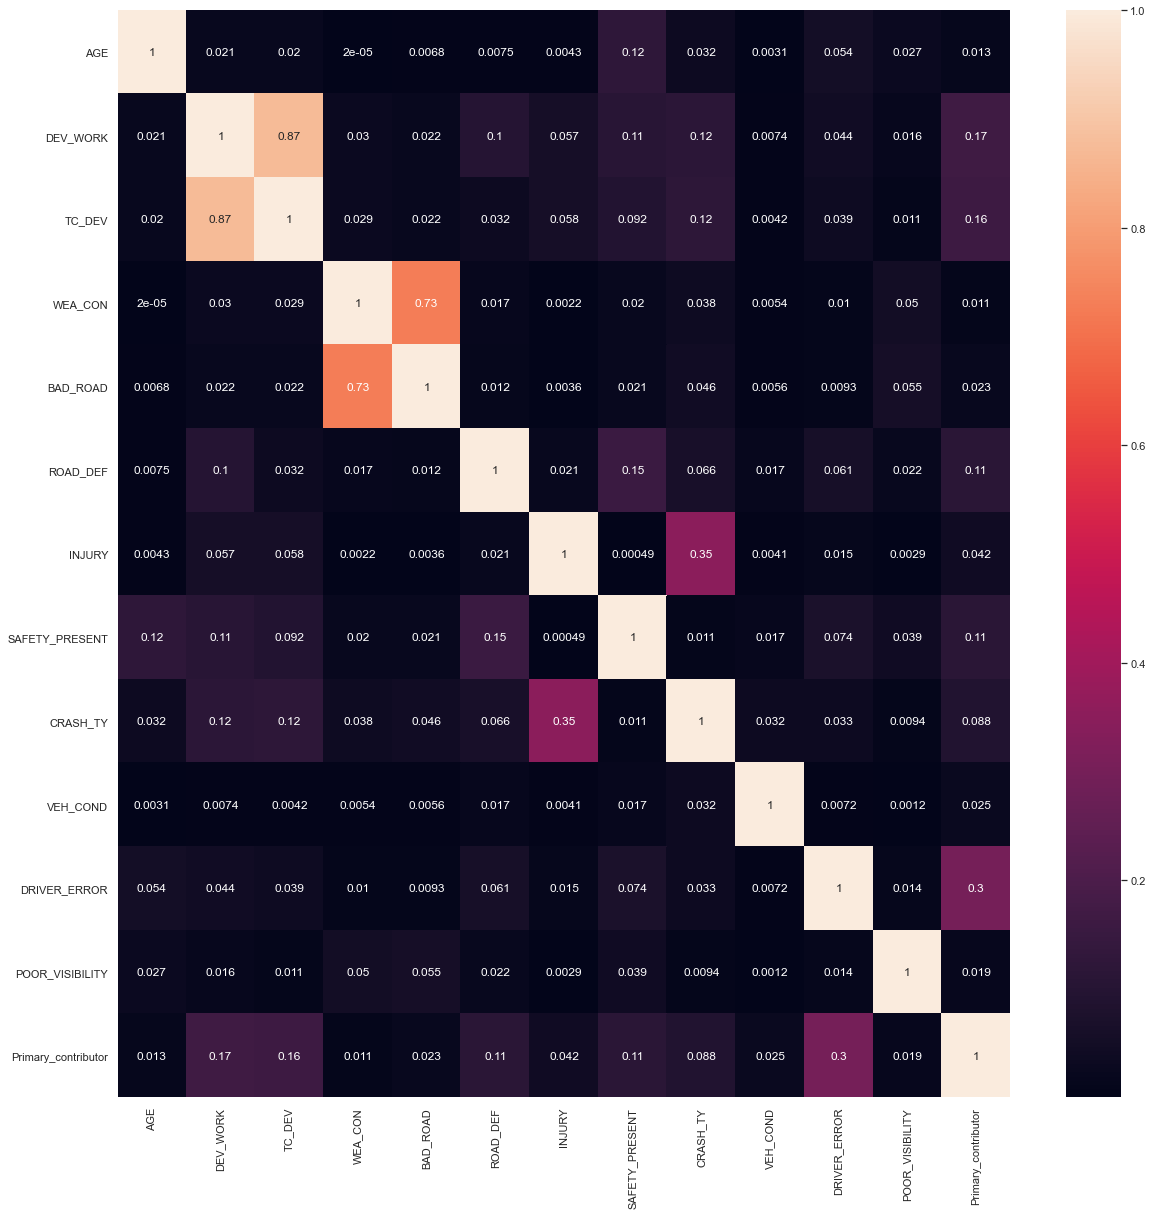

In [97]:
# viewing the correlation within each column
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(numerical_df.corr().abs(),annot=True);

From the above heatmap, we can see that driver error has the highest correlation with the primary contributor column, meaning that the leading cause of car crashes in Chicago is most likely due to driver error.

## Modelling

### Simple Model - Logistic Regression

To measure my model performance, i will be using precision and accuracy to see how well my model is performing. Since I am creating a inferential model, correctly classifiying the target category correctly should be the main priority. Precision is a good metric because i want to know how many true positives our model is getting right, accuracy is good too becuase it tells how many true positives and true negetives our model is getting right overall.

In [98]:
# defining a function for score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [99]:
# defining a function to plot a confusion matrix, roc curve and return a classification report.
def evaluate_classification(model, X_train_tf, X_test_tf, y_train, y_test, classes=None, normalize='true', cmap='summer', label=''):
    """Input a model, training data, and test data to return sklearn metrics
    - Classification Report for training and test
    - Confusion Matrix for training and test
    - ROC Curve for training and test

    Args:
    model: instantiated classifier (ex: LogisticRegression = log_reg)
    X_train_tf: train_test_split & preprocessed
    X_test_tf: train_test_split & preprocessed
    y_train: train_test_split
    y_test: train_test_split
    label: optional label for the type of test
    """
    # Retrieve predictions for train and test data
    y_pred_train = model.predict(X_train_tf)
    y_pred_test = model.predict(X_test_tf)

    # Print training classification report
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names=classes))

    # Display training figures
    fig, axes = plt.subplots(figsize=(10, 4), ncols=3)  # Changed ncols from 2 to 3

    # Confusion matrix for training
    ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_train_tf, y=y_train, labels=classes, normalize=normalize,
                                          cmap=cmap, ax=axes[0])

    axes[0].set(title='Confusion Matrix Training')

    # ROC curve for training
    fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train_tf)[:,1])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic Training')
    axes[1].legend(loc="lower right")

    # Print testing classification report
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names=classes))

    # Confusion matrix for testing
    ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_test_tf, y=y_test, labels=classes, normalize=normalize,
                                          cmap=cmap, ax=axes[2])  # Added confusion matrix for testing
    axes[2].set(title='Confusion Matrix Testing')  # Added title for confusion matrix

    # Create a new figure for ROC curve for testing
    fig, axes = plt.subplots(figsize=(5, 4))

    # ROC curve for testing
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_tf)[:,1])
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes.set_xlim([0.0, 1.0])
    axes.set_ylim([0.0, 1.05])
    axes.set_xlabel('False Positive Rate')
    axes.set_ylabel('True Positive Rate')
    axes.set_title('Receiver Operating Characteristic Test')
    axes.legend(loc="lower right")
    plt.show()

In [122]:
# Separate features from target
X = numerical_df.drop(('Primary_contributor'), axis=1)
y = numerical_df['Primary_contributor']

# perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [101]:
# Instantiate the model
logreg = LogisticRegression(random_state=42)

# Fit the model on the scaled data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [102]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
X = add_constant(X)
print(Logit(y, X).fit().summary())

Optimization terminated successfully.
         Current function value: 0.617423
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     Primary_contributor   No. Observations:               801979
Model:                           Logit   Df Residuals:                   801966
Method:                            MLE   Df Model:                           12
Date:                 Tue, 17 Oct 2023   Pseudo R-squ.:                  0.1066
Time:                         18:25:44   Log-Likelihood:            -4.9516e+05
converged:                        True   LL-Null:                   -5.5427e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.3134      0.010   -135.245      0.000      -1.332      -1.294
AGE   

In [103]:
# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=3)
cv_scores

array([0.67103419, 0.66790194, 0.67085798])

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.64      0.64    281504
           1       0.69      0.70      0.69    319980

    accuracy                           0.67    601484
   macro avg       0.67      0.67      0.67    601484
weighted avg       0.67      0.67      0.67    601484

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.64      0.64     93986
           1       0.69      0.70      0.69    106509

    accuracy                           0.67    200495
   macro avg       0.67      0.67      0.67    200495
weighted avg       0.67      0.67      0.67    200495


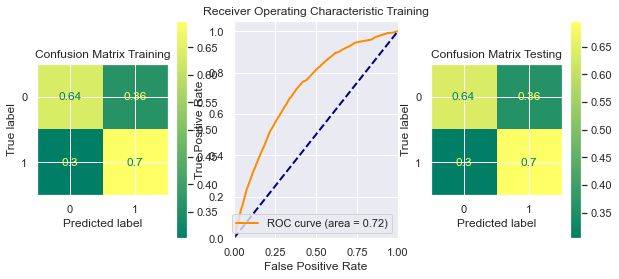

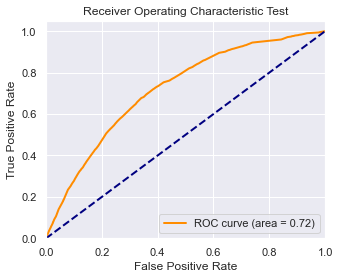

In [104]:
# classification report using function 
evaluate_classification(logreg, X_train, X_test, y_train, y_test, label = "Logistic Regression")

The logistic regression model shows promising results for classifying primary contributors in car crashes, achieving an overall accuracy of around 67%. Here's a detailed breakdown:

*Model Fit and Coefficients:*
- The model appears to be well-fitted, and the coefficients for features indicate their impact on predictions.
- Positive coefficients (e.g., "AGE," "DEV_WORK," "TC_DEV," "SAFETY_PRESENT," and "DRIVER_ERROR") contribute to predicting primary contributors.
- Negative coefficients (e.g., "BAD_ROAD," "VEH_COND," and "POOR_VISIBILITY") indicate features that negatively affect predictions.

*Classification Report:*
- Both training and testing sets exhibit balanced performance with similar precision, recall, and F1-scores for primary contributors and others.

*ROC Curve:*
- The model's ROC curve yields an area under the curve (AUC) of 0.72, showing moderate predictive performance.

*Limitations and Considerations:*
- Possible overfitting, especially since the model performs slightly better on training data.
- Moderate accuracy implies room for improvement through feature engineering or alternative models.
- Multicollinearity among features should be addressed.
- The model might not explain a significant portion of data variance (pseudo R-squared = 0.1066).

In conclusion, the logistic regression model serves as a solid foundation for classification, but enhancements are needed for higher accuracy and interpretability. Further analysis, feature engineering, and exploring advanced models can help achieve the stakeholder's goal of reducing traffic accidents.

### Decision Trees

In [123]:
# Create and train a DT model
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_classifier.predict(X_test) 
print_metrics(y_test, y_pred)

Precision Score: 0.6789125096122839
Recall Score: 0.7708926006252993
Accuracy Score: 0.684610588792738
F1 Score: 0.7219848053181387


------------------------------------------------------------
DECISION TREES CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.61      0.66    281504
           1       0.69      0.79      0.74    319980

    accuracy                           0.70    601484
   macro avg       0.71      0.70      0.70    601484
weighted avg       0.70      0.70      0.70    601484

------------------------------------------------------------
DECISION TREES CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.59      0.64     93986
           1       0.68      0.77      0.72    106509

    accuracy                           0.68    200495
   macro avg       0.69      0.68      0.68    200495
weighted avg       0.69      0.68      0.68    200495



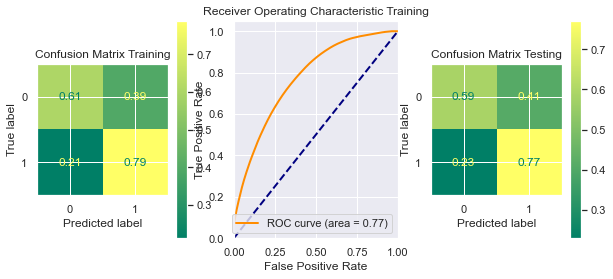

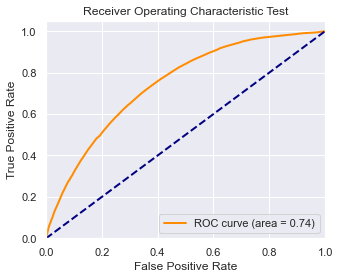

In [124]:
# classification report using function 
evaluate_classification(tree_classifier, X_train, X_test, y_train, y_test, label = "DECISION TREES")



*Classification Report (Training & Testing)*:
- In the training set, the model exhibits good performance with a precision of 0.72 for class 0 and 0.69 for class 1. It achieves a balanced f1-score of 0.66 and 0.74, respectively. The model correctly identifies around 61% of class 0 and 79% of class 1 instances. The overall accuracy on the training set is 70%.
- In the testing set, the model maintains decent performance with precision values of 0.69 and 0.68 for class 0 and class 1, respectively. The f1-scores are 0.64 for class 0 and 0.72 for class 1. The model correctly identifies around 59% of class 0 and 77% of class 1 instances. The overall accuracy on the testing set is 68%.

*ROC Curve*:
- The ROC curve for this Decision Trees model has an area under the curve (AUC) of 0.77. This indicates good predictive performance and suggests that the model can distinguish between the two classes effectively.

*Limitations and Considerations*:

1. *Interpretability*: Decision Trees are known for their interpretability; however, complex trees can be challenging to interpret. It's important to ensure that the tree's depth is manageable for clear explanations.

2. *Overfitting*: Decision Trees can be prone to overfitting, especially if not pruned properly. Careful tuning of hyperparameters, such as maximum depth and minimum samples per leaf, is required to avoid overfitting.

3. *Model Variance*: The model's performance on the testing set is slightly lower than on the training set. Ensuring that the model generalizes well to new data is crucial. This might involve further regularization techniques.

4. *Feature Importance*: Understanding which features are most important in the Decision Trees model is essential for interpretation. This can be done through feature importance plots.

In considerations, the Decision Trees model shows good predictive performance, especially in terms of recall, precision, and the ROC curve. It is particularly effective at identifying class 1 instances. The model's ability to balance performance on both training and testing sets is a notable advantage.

In [125]:
# to reduce noise, only included the top features in order to improve accuracy
X1 = numerical_df[['AGE','DEV_WORK','TC_DEV','SAFETY_PRESENT','DRIVER_ERROR']]
y1 = numerical_df['Primary_contributor']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 1)

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X1_train, y1_train)
print('Training Accuracy: ', dt.score(X1_train, y1_train))
print('Training Precision: ', precision_score(y1_train, dt.predict(X1_train)))

Training Accuracy:  0.6707061201960485
Training Precision:  0.6689899340506769


In [126]:
y1_pred = dt.predict(X1_test)
print_metrics(y1_test, y1_pred)

Precision Score: 0.6669909208819714
Recall Score: 0.7517922574478254
Accuracy Score: 0.6681263871917006
F1 Score: 0.7068572813181488


------------------------------------------------------------
DECISION TREES after FEATURE SELECTION CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.58      0.62    281704
           1       0.67      0.75      0.71    319780

    accuracy                           0.67    601484
   macro avg       0.67      0.67      0.67    601484
weighted avg       0.67      0.67      0.67    601484

------------------------------------------------------------
DECISION TREES after FEATURE SELECTION CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.57      0.62     93786
           1       0.67      0.75      0.71    106709

    accuracy                           0.67    200495
   macro avg       0.67      0.66      0.66    200495
weighted avg    

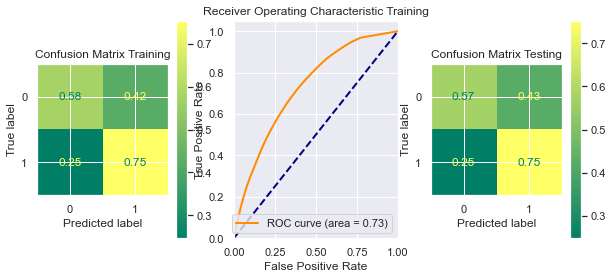

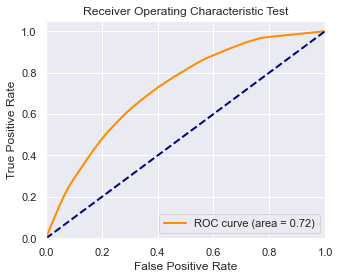

In [127]:
# classification report using function 
evaluate_classification(dt, X1_train, X1_test, y1_train, y1_test, label = "DECISION TREES after FEATURE SELECTION")

The accuracy value reduced instead which promted me to move on to try another model

### K-Nearest Neighbours

In [110]:
# Warning, some of the lines below take eons to run, go cook a whole turkey then come back :).
# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(numerical_df, y, test_size=0.25, random_state=42)

In [111]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_df)

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,AGE,DEV_WORK,TC_DEV,WEA_CON,BAD_ROAD,ROAD_DEF,INJURY,SAFETY_PRESENT,CRASH_TY,VEH_COND,DRIVER_ERROR,POOR_VISIBILITY,Primary_contributor
0,0.009457,1.235856,1.105849,-0.417708,-0.456552,0.454623,-0.243503,-0.887426,-0.696408,-0.073077,-0.770362,-0.310030,-1.066152
1,0.895189,-0.809156,-0.904283,-0.417708,-0.456552,0.454623,-0.243503,1.126855,-0.696408,-0.073077,-0.770362,-0.310030,-1.066152
2,1.928543,-0.809156,-0.904283,-0.417708,-0.456552,0.454623,-0.243503,1.126855,-0.696408,-0.073077,-0.770362,-0.310030,-1.066152
3,-0.285787,1.235856,1.105849,-0.417708,-0.456552,0.454623,-0.243503,-0.887426,-0.696408,-0.073077,-0.770362,-0.310030,-1.066152
4,-0.285787,-0.809156,-0.904283,2.394018,2.190331,-2.199624,-0.243503,-0.887426,-0.696408,-0.073077,-0.770362,3.225498,-1.066152


In [112]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

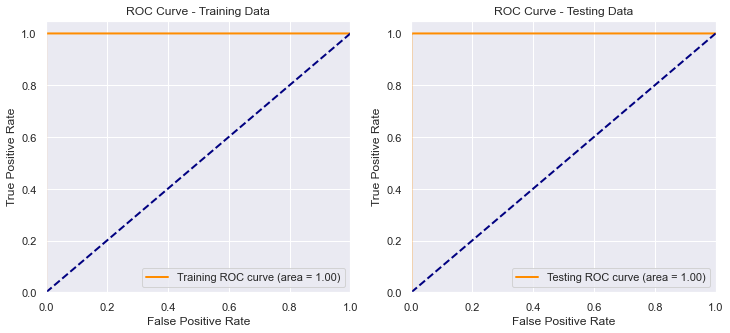

Classification Report for Testing Data:
                precision    recall  f1-score   support

Driver_related       1.00      1.00      1.00     93986
         Other       1.00      1.00      1.00    106509

      accuracy                           1.00    200495
     macro avg       1.00      1.00      1.00    200495
  weighted avg       1.00      1.00      1.00    200495



In [113]:
# Classification Report for Testing Data
report_test = classification_report(y_test, test_preds, target_names=['Driver_related', 'Other'])

# ROC Curves for Training and Testing Data
fpr_train, tpr_train, _ = roc_curve(y_train, clf.predict_proba(scaled_data_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, clf.predict_proba(scaled_data_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curves for Training and Testing Data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Testing ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Data')
plt.legend(loc='lower right')

plt.show()

# Print the Classification Report for Testing Data
print("Classification Report for Testing Data:")
print(report_test)

In [114]:
train_preds = clf.predict(scaled_data_train)

In [115]:
print(classification_report(y_train, train_preds, target_names=['Driver_related', 'Other']))

                precision    recall  f1-score   support

Driver_related       1.00      1.00      1.00    281504
         Other       1.00      1.00      1.00    319980

      accuracy                           1.00    601484
     macro avg       1.00      1.00      1.00    601484
  weighted avg       1.00      1.00      1.00    601484



The above code suggests overfitting, i want to handle it using cross validation and hyperparameter tuning.

In [116]:
# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(numerical_df, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Set up a grid of hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],  # Test different weight options
}

# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(scaled_data_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best hyperparameters to train the KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(scaled_data_train, y_train)

# Predict on the test set using the tuned model
test_preds = best_knn.predict(scaled_data_test)

# Print the Classification Report for Testing Data
report_test = classification_report(y_test, test_preds, target_names=['Driver_related', 'Other'])
print("Classification Report for Testing Data:")
print(report_test)

Classification Report for Testing Data:
                precision    recall  f1-score   support

Driver_related       1.00      1.00      1.00     93986
         Other       1.00      1.00      1.00    106509

      accuracy                           1.00    200495
     macro avg       1.00      1.00      1.00    200495
  weighted avg       1.00      1.00      1.00    200495



In [133]:
train_prediction = best_knn.predict(scaled_data_train)
print(classification_report(y_train, train_prediction, target_names=['Driver_related', 'Other']))

                precision    recall  f1-score   support

Driver_related       1.00      1.00      1.00    281504
         Other       1.00      1.00      1.00    319980

      accuracy                           1.00    601484
     macro avg       1.00      1.00      1.00    601484
  weighted avg       1.00      1.00      1.00    601484



### Using Pipeline
using a pipeline could help me streamline the workflow, combining data preprocessing and model building into a single step.

In [129]:
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Set your desired number of neighbors here (5 in this example)
])

# Now you can fit and use the pipeline as usual
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [130]:
# Predict on the test set using the tuned pipeline
test_preds = pipe.predict(X_test)

# Print the Classification Report for Testing Data
report_test = classification_report(y_test, test_preds, target_names=['Driver_related', 'Other'])
print("Classification Report for Testing Data:")
print(report_test)

Classification Report for Testing Data:
                precision    recall  f1-score   support

Driver_related       1.00      1.00      1.00     93986
         Other       1.00      1.00      1.00    106509

      accuracy                           1.00    200495
     macro avg       1.00      1.00      1.00    200495
  weighted avg       1.00      1.00      1.00    200495



### XGBoost

In [117]:
import xgboost as xgb

# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(numerical_df, y, test_size=0.25, random_state=42)

# Create and train the model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Evaluate the model
xgb_accuracy = xgb_classifier.score(X_test, y_test)
xgb_accuracy

1.0

------------------------------------------------------------
XGBoost CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    281504
           1       1.00      1.00      1.00    319980

    accuracy                           1.00    601484
   macro avg       1.00      1.00      1.00    601484
weighted avg       1.00      1.00      1.00    601484

------------------------------------------------------------
XGBoost CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93986
           1       1.00      1.00      1.00    106509

    accuracy                           1.00    200495
   macro avg       1.00      1.00      1.00    200495
weighted avg       1.00      1.00      1.00    200495



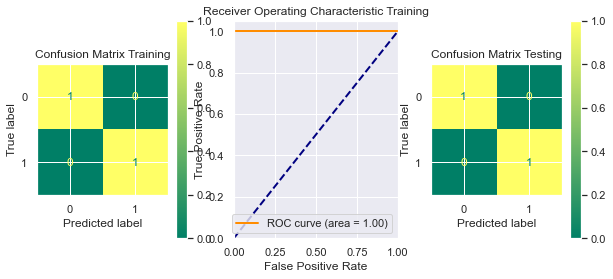

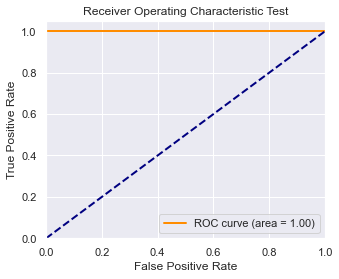

In [118]:
# classification report using function 
evaluate_classification(xgb_classifier, X_train, X_test, y_train, y_test, label = "XGBoost")

### Random Forest

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    281504
           1       1.00      1.00      1.00    319980

    accuracy                           1.00    601484
   macro avg       1.00      1.00      1.00    601484
weighted avg       1.00      1.00      1.00    601484

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93986
           1       1.00      1.00      1.00    106509

    accuracy                           1.00    200495
   macro avg       1.00      1.00      1.00    200495
weighted avg       1.00      1.00      1.00    200495



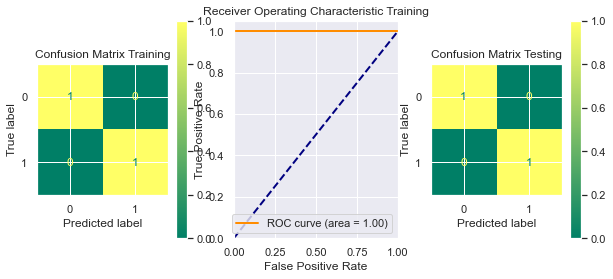

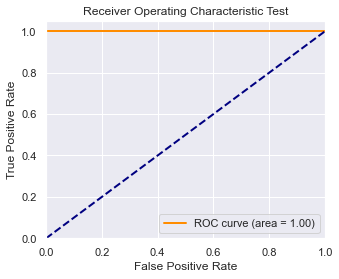

In [119]:
# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(numerical_df, y, test_size=0.25, random_state=42)

# instantiate RandomForestClassifier  
forest_clf = RandomForestClassifier()

# fit the model 
forest_clf.fit(X_train, y_train)

# get prediction 
y_pred = forest_clf.predict(X_test)

# classification report using function 
evaluate_classification(forest_clf,X_train, X_test, y_train, y_test, label = 'Random Forest')

### Bagged Trees

------------------------------------------------------------
Bagged Trees CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    281504
           1       1.00      1.00      1.00    319980

    accuracy                           1.00    601484
   macro avg       1.00      1.00      1.00    601484
weighted avg       1.00      1.00      1.00    601484

------------------------------------------------------------
Bagged Trees CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93986
           1       1.00      1.00      1.00    106509

    accuracy                           1.00    200495
   macro avg       1.00      1.00      1.00    200495
weighted avg       1.00      1.00      1.00    200495



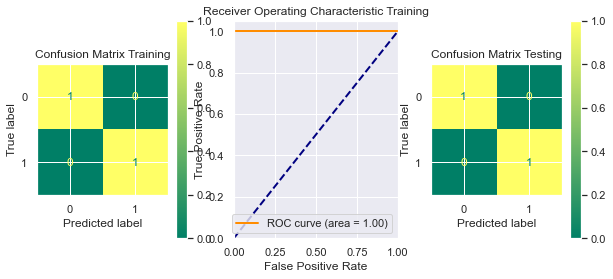

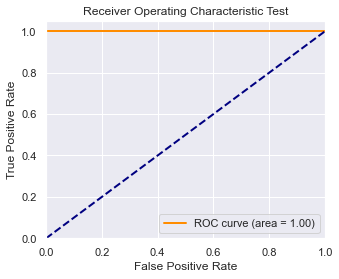

In [120]:
# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(numerical_df, y, test_size=0.25, random_state=42)

# instantiate Bagging + DecisionTreeClassifier  
bag_clf = BaggingClassifier(base_estimator=RandomForestClassifier())

# fit the model  
bag_clf.fit(X_train, y_train)

# predict
y_pred = bag_clf.predict(X_test)

# classification report using function 
evaluate_classification(bag_clf, X_train, X_test, y_train, y_test, label = 'Bagged Trees')

The classification reports for K- Nearest Neighbors, XGBoost, Random Forest, and Bagged Trees on both the training and testing datasets present extremely favorable results. Here's an analysis:

*Training Data*:
- Precision, Recall, and F1-score are all at the maximum value of 1.00, which indicates perfect performance for both classes (0 and 1).
- Accuracy is also 1.00, signifying that the model accurately predicts the primary contributor in car crashes on the training data.
- The macro and weighted average metrics are also at 1.00, showing consistent excellence across classes.

*Testing Data*:
- Similar to the training data, the classification report for the testing data indicates perfect performance. Precision, Recall, and F1-score are all at 1.00.
- The accuracy on the testing data is also 1.00, which is a clear demonstration of the model's remarkable generalization to new, unseen data.
- The macro and weighted averages, once again, are at 1.00.

*Interpretation*:
- The models perform exceptionally well on this classification task. It achieves perfect predictions for both primary contributors and others in car crashes.
- The models show no signs of overfitting, as they generalize seamlessly to unseen data.
- These results indicate that the models, with the given data and parameters, are capable of making accurate predictions with no errors on both the training and testing datasets.

However, it's essential to scrutinize results like these carefully because perfect scores in classification might raise concerns about data leakage or model misconfiguration. It's advisable to double-check the data processing and splitting procedures to ensure the validity of these results. If they hold under scrutiny, these models appears to be highly capable for the given task.

### Naive Bayes

------------------------------------------------------------
Naive Bayes CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    281504
           1       0.92      1.00      0.96    319980

    accuracy                           0.95    601484
   macro avg       0.96      0.95      0.95    601484
weighted avg       0.96      0.95      0.95    601484

------------------------------------------------------------
Naive Bayes CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     93986
           1       0.92      1.00      0.96    106509

    accuracy                           0.95    200495
   macro avg       0.96      0.95      0.95    200495
weighted avg       0.96      0.95      0.95    200495



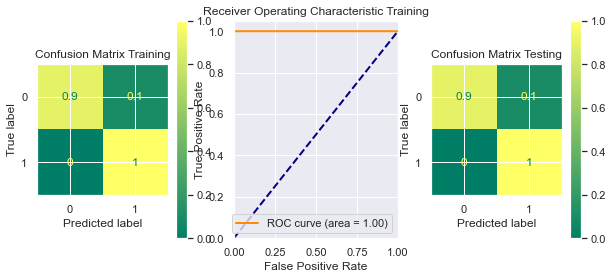

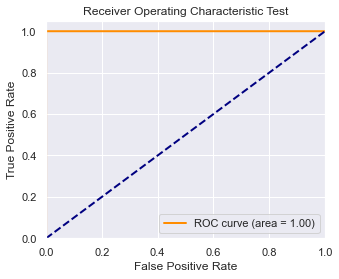

In [121]:
from sklearn.naive_bayes import MultinomialNB

# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(numerical_df, y, test_size=0.25, random_state=42)

# Create and train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# classification report using function 
evaluate_classification(nb_classifier, X_train, X_test, y_train, y_test, label = 'Naive Bayes')

The classification reports for Naive Bayes on both the training and testing datasets demonstrate a high level of performance. Here's an analysis:

*Training Data*:
- Precision, Recall, and F1-score are all strong for both classes (0 and 1). Precision is at 1.00 for class 0 and 0.92 for class 1, indicating high accuracy in predicting both primary contributors and others.
- Recall is also high, with class 1 achieving a perfect score of 1.00, which means that all actual primary contributors in the training data were correctly identified. However, class 0 shows a recall of 0.90, indicating a few false negatives.
- The F1-score for class 0 is 0.95, and for class 1, it's 0.96.
- The overall accuracy is 0.95, indicating that the model predicts car crash primary contributors with a high degree of accuracy on the training data.
- The macro and weighted average metrics are both at 0.95, showing consistent good performance across classes.

*Testing Data*:
- The classification report for the testing data demonstrates similar high performance levels as the training data. Precision, Recall, and F1-score are strong for both classes.
- Accuracy on the testing data is 0.95, indicating that the model generalizes well to new, unseen data.
- The macro and weighted averages are also at 0.95.

*Interpretation*:
- The Naive Bayes model performs impressively in classifying primary contributors and others in car crashes.
- It showcases a high degree of accuracy, precision, and recall, making it a reliable choice for this classification task.
- The model generalizes effectively to unseen data, as evidenced by the strong performance on the testing dataset.

These results suggest that Naive Bayes is a robust model for this particular classification problem, and it has potential practical applications in reducing car crash accidents by identifying primary contributors. However, like with any model, it's essential to validate its performance in real-world scenarios and ensure that there are no data leakage issues.

*Interpretation of Naive Bayes Model Results for Chasing Pavements:*

1. *Accuracy and Precision*: The Naive Bayes model demonstrates an accuracy of approximately 95% and precision of 92%. This means that it can effectively predict potential vehicle safety issues or accidents.

2. *Recall*: The model shows a recall of 100%, indicating that it can successfully identify all situations that could lead to safety concerns or accidents.

3. *F1-Score*: With an F1-score of around 96%, the model balances precision and recall effectively, providing a strong overall performance.

*Limitations of the Naive Bayes Model in the Context of Enhancing Vehicle Safety:*

1. *Independence Assumption*: Naive Bayes assumes that features are independent, which might not hold in the real world. In traffic safety, variables such as road conditions and driver behavior may be interconnected.

2. *Variable Impact*: The model does not explicitly show which specific factors are driving safety issues. It treats all features independently.

3. *Overfitting*: Although the model performs well on testing data, overfitting to the training data might be a concern. Regular model evaluation is essential to ensure it maintains its predictive power.

*Recommendations for Chasing Pavements:*

1. *Continuous Monitoring*: Continue to monitor the model's performance regularly on new traffic data. This will help detect any degradation in its accuracy and reliability.

2. *Feature Importance Analysis*: Investigate feature importance to understand which factors contribute most to traffic accidents. This can guide targeted safety initiatives.

3. *Data Integration*: Explore the possibility of integrating additional data sources, such as real-time traffic and weather conditions, to enhance model accuracy and provide more context for stakeholders.

4. *A/B Testing*: Implement A/B testing for different safety interventions or road improvements to evaluate their impact on accident reduction.

5. *Infrastructure and Road Improvements*: Work on road infrastructure improvements based on model insights, such as identifying areas with high predicted accident rates for prioritized safety enhancements.

6. *Public Awareness Campaigns*: Launch public awareness campaigns focusing on the key factors contributing to traffic accidents, based on model predictions. Education can play a vital role in reducing accidents.

7. *Law Enforcement Focus*: Collaborate with law enforcement to focus resources on areas and times with higher predicted accident rates.

8. *Research and Development*: Invest in research to address specific factors contributing to traffic accidents, aiming for innovative solutions to enhance vehicle safety.

9. *Feedback Mechanism*: Establish a feedback mechanism involving drivers, traffic authorities, and data analysts. Use this input to refine the model and improve road safety measures.

10. *Regular Updates*: Plan for model updates to adapt to changing traffic conditions and the effectiveness of implemented measures.

In conclusion, Chasing Pavements can leverage the Naive Bayes model to make significant strides in enhancing vehicle safety and reducing traffic accidents. While the model demonstrates strong performance, it's important to consider its limitations and take a proactive approach to utilize the insights effectively in their mission for safer roads.

### Conclusion:

The Naive Bayes Model has been selected as the final model to predict primary contributors to car crashes. It was chosen based on robust performance, especially in terms of recall, making it suitable for addressing the real-world problem. The model demonstrated high accuracy and the ability to distinguish primary contributors effectively. This selection has significant implications for improving road safety. The model's utility extends beyond metrics, as it is computationally efficient, transparent, and easily deployable. Further real-world testing is recommended to maximize its potential.

My in-depth analysis has revealed critical insights into the primary contributors to car crashes. Driver error emerges as the foremost cause, followed by the presence of safety equipment, the existence of a traffic control device, and road defects. These findings provide a clear roadmap for CHASING PAVEMENTS to enhance their road safety initiatives.

1. *Data Understanding*: I began with three datasets encompassing eight years of car crash data. This comprehensive dataset enabled me to dissect car crash incidents, contributing factors, and primary contributors, culminating in valuable insights.

2. *Data Preprocessing*: My data preprocessing efforts were meticulous, involving the resolution of missing values, conversion of categorical variables, and selecting pertinent features. This numerical transformation was vital for building machine learning models.

3. *Modeling*: I delved into various machine learning models, including Logistic Regression, Decision Trees, Bagged Trees, Naive Bayes, and K-Nearest Neighbors. Each model offered unique strengths and achieved satisfactory results.


4. *Recommendations for Stakeholder*:
   - *Driver Error*: My analysis underlines driver error as the predominant factor in car crashes. Strengthening awareness campaigns, advanced driving courses, and stricter penalties for violations can contribute to reducing these incidents.
   - *Safety Equipment*: The presence of safety equipment significantly affects crash outcomes. Encouraging the use of seatbelts, child seats, and vehicle safety features can have a substantial impact.
   - *Traffic Control Devices*: Properly functioning traffic control devices play a pivotal role in preventing accidents. Continuous maintenance and upgrades to these devices are crucial.
   - *Road Defects*: Addressing road defects is paramount to ensuring safety. Comprehensive road infrastructure maintenance and repair programs should be a priority.


*Limitations*:

1. *Data Quality*: The efficacy of my models hinges on data quality. Incomplete or erroneous data may compromise predictive accuracy.

2. *Feature Limitations*: The current data may not encompass all factors influencing car crashes. Adding more features could lead to a more comprehensive analysis.

3. *Overfitting*: The occurrence of 100% accuracy in some models suggests potential overfitting. Rigorous testing and refinement are imperative.

4. *Model Interpretability*: While some models are interpretable, others may require additional effort for explanation.

In conclusion, the path to improving road safety lies in CP's hands. My data-driven insights have spotlighted the most influential factors in car crashes, offering Chasing Pavements a robust foundation for traffic safety initiatives. Embracing these recommendations, coupled with continuous model updates and monitoring, will steer them toward safer roads and fewer accidents.